<a href="https://colab.research.google.com/github/AhmedTalima23/DEPI_Final_Project/blob/main/DEPI_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee Churn Prediction & Analysis Project

- Team members:

Ahmed Mohamed Mahmoud ( **Team Leader** )

Malak Torky

Shrouk Emam

Seif Ahmed

Theodore naguib

Salah Mohamed

---

**Supervised By Eng\ Mahmoud Talaat**

---

Here’s a structured plan to accomplish the tasks and deliverables for our churn prediction project:

---

### *1. Data Collection*
- *Objective*: Acquire a dataset suitable for churn prediction.
- *Steps*:
  1. Search for churn datasets on platforms like:

  2. Ensure the dataset includes:
     - Customer demographics (e.g., age, gender, location).
     - Usage patterns (e.g., monthly usage, logins, service calls).
     - Subscription details (e.g., contract type, tenure, monthly charges).
     - Target variable: Churn status (e.g., "Yes" or "No").

---

### *2. Data Exploration*
- *Objective*: Understand the dataset’s structure and identify relationships, missing values, and outliers.
- *Steps*:
  1. Load the dataset using Python libraries like pandas and numpy.
  2. Perform initial checks:
     - Use df.info() to check data types and missing values.
     - Use df.describe() to summarize numerical features.
     - Use df.isnull().sum() to identify missing values.
     - Use df.duplicated().sum() to check for duplicates.
  3. Analyze distributions:
     - Plot histograms or boxplots for numerical features.
     - Use bar plots for categorical features.
  4. Identify outliers using statistical methods (e.g., IQR or Z-score).

---

### *3. Preprocessing and Feature Engineering*
- *Objective*: Clean and prepare the dataset for machine learning.
- *Steps*:
  1. *Handle Missing Data*:
     - Use imputation (e.g., mean/median for numerical, mode for categorical) or remove rows/columns with excessive missing values.
  2. *Handle Outliers*:
     - Cap/floor outliers or remove them based on domain knowledge.
  3. *Feature Transformation*:
     - Scale numerical features using StandardScaler or MinMaxScaler.
     - Encode categorical features using OneHotEncoder or LabelEncoder.
  4. *Feature Engineering*:
     - Create new features (e.g., tenure in years, average monthly spend).
     - Generate interaction features (e.g., usage per contract type).

---

### *4. Exploratory Data Analysis (EDA)*
- *Objective*: Visualize patterns, correlations, and relationships in the data.
- *Steps*:
  1. *Univariate Analysis*:
     - Plot histograms, boxplots, and bar charts for individual features.
  2. *Bivariate Analysis*:
     - Use scatterplots, pair plots, and correlation heatmaps to analyze relationships between features.
  3. *Multivariate Analysis*:
     - Use pair plots or grouped bar charts to analyze interactions between multiple features.
  4. *Churn Analysis*:
     - Compare churn rates across different customer segments (e.g., by gender, contract type).
  5. *Document Insights*:
     - Summarize key findings (e.g., "Customers with month-to-month contracts have higher churn rates").

---

### *Tools and Libraries*
- *Python Libraries*:
  - Data Manipulation: pandas, numpy.
  - Visualization: matplotlib, seaborn, plotly.
  - Preprocessing: scikit-learn (for scaling, encoding, imputation).
- *Notebook*: Jupyter Notebook or Google Colab.

---

Milestone 1: Data Collection, Exploration, and Preprocessing

# Loading Libraries and Collecting data

In [1]:
# ========== 1. Import Basic Libraries ==========

# Widgets for interactivity in Jupyter notebooks
import ipywidgets
from ipywidgets import interact

# Numerical and data handling
import numpy as np
import pandas as pd

# ========== 2. Visualization Libraries ==========

# Basic plotting and visualization
import seaborn as sns
import matplotlib.pyplot as plt # Ensures plots display inside the notebook
import matplotlib.ticker as mticker  # Customizes tick marks

# Interactive plotting
import plotly.express as px
import cufflinks as cf
import plotly.offline
cf.go_offline()  # Enable offline mode for Plotly
cf.set_config_file(offline=False, world_readable=True)  # Configure Plotly settings

# Colored text output in terminal (useful for highlighting results)
from termcolor import colored
from termcolor import cprint
import plotly.io as pio
pio.renderers.default = 'colab'
# Generate word clouds from text data
from wordcloud import WordCloud

# ========== 3. Statistical & Missing Data Analysis ==========

# Statistical methods
import scipy.stats as stats
from scipy.cluster.hierarchy import linkage, dendrogram  # Hierarchical clustering

# Statistical modeling
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Visualize missing values
import missingno as msno

# ========== 4. Time Handling ==========

import datetime as dt
from datetime import datetime

# ========== 5. Machine Learning Models & Tools ==========

# Clustering models
from sklearn.cluster import KMeans, AgglomerativeClustering

# Data preprocessing
from sklearn.compose import make_column_transformer
from imblearn.over_sampling import SMOTE  # Handle imbalanced datasets
from sklearn.decomposition import PCA  # Principal Component Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Tree-based and ensemble models
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesRegressor, AdaBoostClassifier

# Feature selection
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression

# Imputation
from sklearn.impute import SimpleImputer, KNNImputer

# Regression models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# Model evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, f1_score, recall_score
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.metrics import silhouette_samples, silhouette_score  # For clustering evaluation
from sklearn.metrics.cluster import adjusted_rand_score  # Clustering comparison

# Model selection & evaluation
from sklearn.model_selection import (RandomizedSearchCV, GridSearchCV, StratifiedKFold,
                                     RepeatedStratifiedKFold, KFold, cross_val_predict,
                                     train_test_split, cross_val_score, cross_validate)

# Classification models
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.tree import plot_tree, DecisionTreeClassifier

# Pipelines
from sklearn.pipeline import make_pipeline, Pipeline

# Data transformation
from sklearn.preprocessing import (scale, StandardScaler, MinMaxScaler, RobustScaler,
                                   PolynomialFeatures, OneHotEncoder, PowerTransformer, LabelEncoder)

# Visual ML performance
from yellowbrick.classifier import ClassificationReport

# XGBoost models
from xgboost import XGBRegressor, XGBClassifier, plot_importance

# ========== 6. Warnings ==========

# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")  # Ignore all warnings
warnings.warn("this will not show")  # This warning will not be shown

# Suppress future warnings (e.g., from pandas or sklearn updates)
warnings.simplefilter(action='ignore', category=FutureWarning)

# ========== 7. Display & Plot Settings ==========

# Set default figure size
plt.rcParams["figure.figsize"] = (10,6)

# Pandas display settings for better viewing
pd.set_option('max_colwidth', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Load and Explore the Dataset

Purpose: Load the dataset into the notebook for analysis

In [2]:
df = pd.read_csv("HR_Dataset.csv")

# Data Exploration

Display the first few rows of the dataset to get a sense of the data.


In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.380,0.530,2,157,3,0,1,0,sales,low
1,0.800,0.860,5,262,6,0,1,0,sales,medium
2,0.110,0.880,7,272,4,0,1,0,sales,medium
3,0.720,0.870,5,223,5,0,1,0,sales,low
4,0.370,0.520,2,159,3,0,1,0,sales,low


### Feature Descriptions

- **satisfaction_level**: Employee's satisfaction level (float from 0 to 1, where 1 means fully satisfied).
- **last_evaluation**: Last evaluation score received by the employee (float from 0 to 1).
- **number_project**: Number of projects the employee has worked on.
- **average_montly_hours**: Average monthly working hours of the employee.
- **time_spend_company**: Number of years the employee has spent in the company.
- **Work_accident**: Indicates whether the employee had a work accident (0 = No, 1 = Yes).
- **left**: Target variable – whether the employee left the company (0 = No, 1 = Yes).
- **promotion_last_5years**: Whether the employee was promoted in the last 5 years (0 = No, 1 = Yes).
- **Departments**: Department the employee belongs to (e.g., sales, technical, support, etc.).
- **salary**: Salary level of the employee (categorical: low, medium, high).

In [4]:
# Getting the shape of the dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

# Displaying column names
print("Column Names:")
print(df.columns.tolist())

The dataset contains 14999 rows and 10 columns.

Column Names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Departments ', 'salary']


In [5]:
for col in df.columns :
    print(f"{col} : number of unique values is : {df[col].nunique()}")
    print("==============================================================")

satisfaction_level : number of unique values is : 92
last_evaluation : number of unique values is : 65
number_project : number of unique values is : 6
average_montly_hours : number of unique values is : 215
time_spend_company : number of unique values is : 8
Work_accident : number of unique values is : 2
left : number of unique values is : 2
promotion_last_5years : number of unique values is : 2
Departments  : number of unique values is : 10
salary : number of unique values is : 3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


The data.info() function in pandas is used to display concise summary information about a DataFrame. It provides a quick overview of the structure of the dataset, including important details about the data types and completeness of each column.

**All the data types of the features Are right and in the right order**

---

**Summarize data distributions and basic statistics**

In [7]:
# Showing some statistics about the distribution of the dataset
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000
mean,0.613,0.716,3.803,201.050,3.498,0.145,0.238,0.021
std,0.249,0.171,1.233,49.943,1.460,0.352,0.426,0.144
min,0.090,0.360,2.000,96.000,2.000,0.000,0.000,0.000
25%,0.440,0.560,3.000,156.000,3.000,0.000,0.000,0.000
50%,0.640,0.720,4.000,200.000,3.000,0.000,0.000,0.000
75%,0.820,0.870,5.000,245.000,4.000,0.000,0.000,0.000
max,1.000,1.000,7.000,310.000,10.000,1.000,1.000,1.000


### Insights from Descriptive Statistics

#### 1. Satisfaction Level
- **Mean:** 0.613 — Employees are moderately satisfied on average.
- **Min:** 0.09 — Some employees are extremely dissatisfied.
- **Insight:** The wide range (0.09 to 1.00) shows significant variance in satisfaction. Low satisfaction could contribute to attrition.

#### 2. Last Evaluation
- **Mean:** 0.716 — Most employees receive good evaluation scores.
- **Insight:** High performance does not necessarily prevent attrition, especially if satisfaction or work conditions are poor.

#### 3. Number of Projects
- **Mean:** 3.8 projects
- **Range:** 2 to 7
- **Insight:** Employees with either too few or too many projects may be at higher risk of leaving. Balance in workload is important.

#### 4. Average Monthly Hours
- **Mean:** 201 hours/month (~9.6 hours/day assuming 21 working days)
- **Max:** 310 hours (~14.8 hours/day)
- **Insight:** Some employees work very long hours, which could lead to burnout and higher attrition rates.

#### 5. Time Spent at Company
- **Mean:** ~3.5 years
- **Max:** 10 years
- **Insight:** Most employees stay around 3–4 years. Retention strategies should focus on this timeframe.

#### 6. Work Accidents
- **14.5%** of employees had a work accident.
- **Insight:** Although the rate is relatively low, it may still impact satisfaction and attrition and should be monitored.

#### 7. Left (Target Variable)
- **23.8%** of employees left the company.
- **Insight:** This is a class imbalance scenario. You may need to use techniques like SMOTE to balance the dataset for classification tasks.

#### 8. Promotion in Last 5 Years
- Only **2.1%** of employees were promoted.
- **Insight:** Very low promotion rate. This could indicate limited growth opportunities, which might be a strong factor for attrition.

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

# Data Visualization & Insights

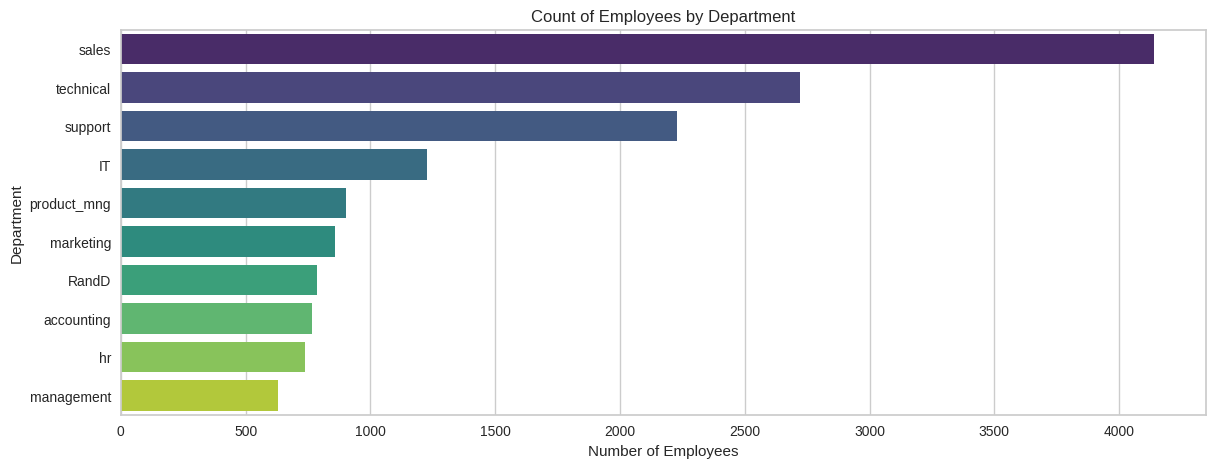

In [9]:
# Count of employees by department
dept_counts = df['Departments '].value_counts().sort_values(ascending=False)

# Create figure and axes for two bar charts
fig, axes = plt.subplots(1, 1, figsize=(14, 5))

# Bar chart for departments
sns.barplot(x=dept_counts.values, y=dept_counts.index, ax=axes, palette='viridis') # Changed axes[0] to axes
axes.set_title('Count of Employees by Department')
axes.set_xlabel('Number of Employees')
axes.set_ylabel('Department')

# plt.tight_layout()
plt.show()


Sales is the largest department (~2500–3000 employees), followed by Technical and Support.

Management, HR, and Accounting are the smallest teams (likely <500 employees each).

Implications:

Larger departments (Sales, Technical) may need more structured HR support to manage turnover or training.

Smaller teams (HR, Management) could indicate lean operations or potential understaffing.

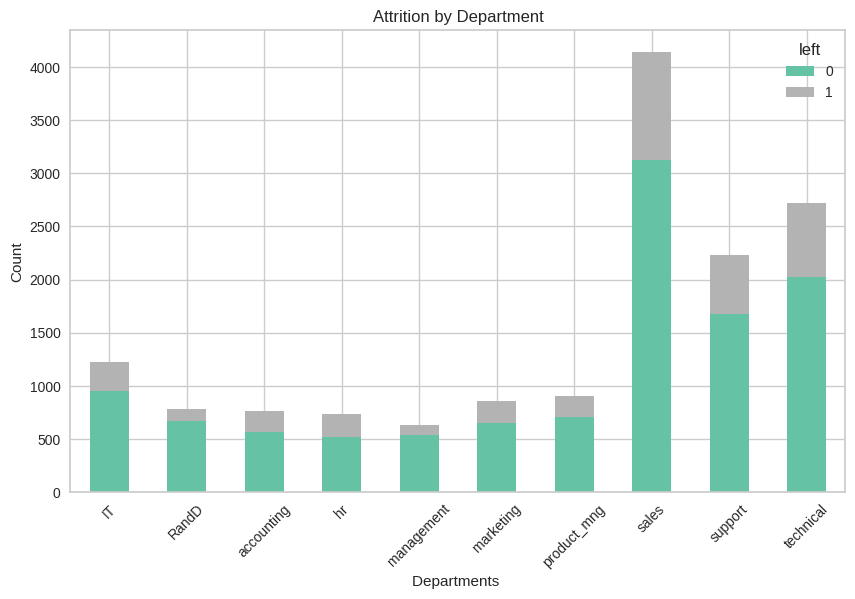

In [10]:
df.groupby(['Departments ', 'left']).size().unstack().plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Attrition by Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 📊 Attrition by Department — Insights

- **Sales** has the **highest number of employees** overall and also the **highest number of employees who left**. This indicates that the Sales department may be facing issues such as high workload, job dissatisfaction, or poor management practices.

- **Technical** and **Support** departments have the next highest employee counts and also show significant attrition, suggesting that these areas may also warrant attention regarding employee retention.

- Departments such as **IT**, **Accounting**, and **Product Management** exhibit a **moderate level of attrition**, but their overall headcount is smaller compared to Sales or Technical.

- **HR**, **RandD (R&D)**, and **Marketing** departments show **lower attrition levels**, both in absolute numbers and as a proportion of their total staff. This might reflect better working conditions, leadership, or job satisfaction in these departments.

- The **Management** department has the **lowest attrition rate**, which could be due to factors such as higher job stability, better compensation, and more engagement in decision-making.

> ✅ This chart highlights which departments may require targeted retention strategies to reduce employee turnover.


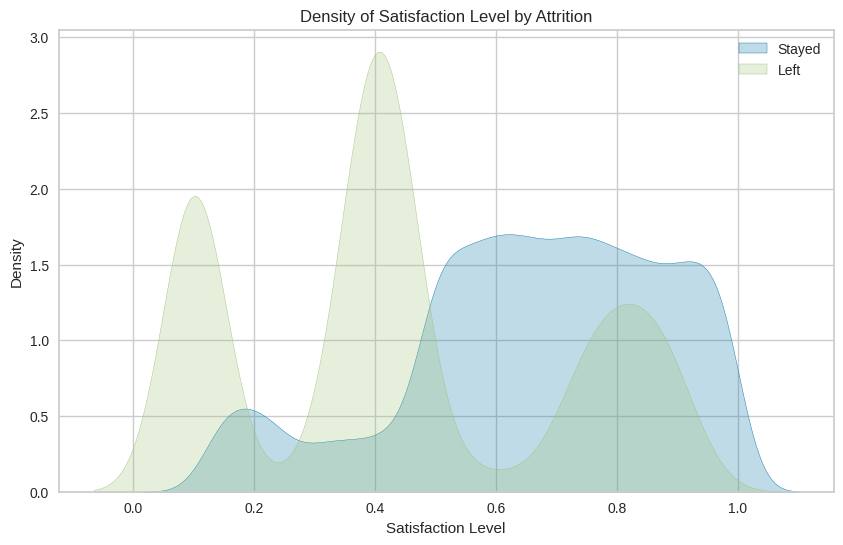

In [11]:
sns.kdeplot(df[df['left']==0]['satisfaction_level'], label='Stayed', shade=True)
sns.kdeplot(df[df['left']==1]['satisfaction_level'], label='Left', shade=True)
plt.title("Density of Satisfaction Level by Attrition")
plt.xlabel("Satisfaction Level")
plt.legend()
plt.show()


### 😊 Satisfaction Level vs Attrition — Insights

- Employees who **left the company** mostly had **low satisfaction levels**, with strong density peaks around **0.1** and **0.4**. This indicates that **low job satisfaction is a key driver of attrition**.

- There is also a **smaller peak near 0.8** for employees who left, suggesting that some high-performing or satisfied individuals may have exited for reasons other than dissatisfaction (e.g., better opportunities).

- Employees who **stayed** exhibit a **higher satisfaction level overall**, with density concentrated between **0.6 and 0.9**. This supports the assumption that **higher satisfaction levels contribute to employee retention**.

- Very few employees with **extremely low or extremely high satisfaction** appear in the “Stayed” category, suggesting extreme ends may indicate eventual churn.

> ✅ This analysis highlights the importance of monitoring employee satisfaction as a predictive factor for attrition and targeting interventions for those in the lower satisfaction ranges.


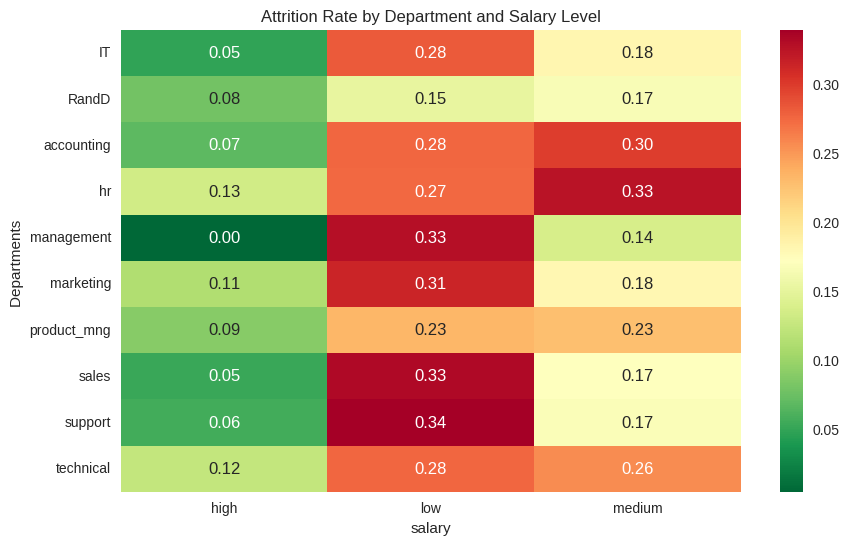

In [12]:
pivot = pd.crosstab(df['Departments '], df['salary'], values=df['left'], aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='RdYlGn_r', fmt=".2f")
plt.title("Attrition Rate by Department and Salary Level")
plt.show()


# Insights: Attrition Rate by Department and Salary Level

## Overview
The table shows attrition rates across departments, segmented by salary levels (high, low, medium). Key observations:

1. **Highest Attrition Departments**:
   - **Support**: Highest attrition in the **low salary** tier (0.34).
   - **HR**: Highest attrition in the **medium salary** tier (0.33).
   - **Accounting**: Close second in medium salary (0.30) and high attrition in low salary (0.28).

2. **Lowest Attrition Departments**:
   - **Management**: Zero attrition in **high salary**, but spikes in **low salary** (0.33).
   - **IT**: Relatively low attrition in **high salary** (0.05), but significant in **low salary** (0.28).

3. **Salary Tier Trends**:
   - **Low Salary**: Consistently high attrition across most departments (e.g., Support: 0.34, Sales: 0.33).
   - **Medium Salary**: High attrition in HR (0.33), Accounting (0.30), and Technical (0.26).
   - **High Salary**: Generally lower attrition, except for Accounting (0.07) and HR (0.13).

4. **Notable Outliers**:
   - **Management**: Unusually high attrition in low salary (0.33) but negligible in high salary (0.00).
   - **Product Management**: Uniform attrition across salary tiers (~0.23).

## Actionable Insights
- **Targeted Retention**: Focus on low/medium salary employees in HR, Support, and Accounting.
- **Salary Adjustments**: High salary tiers show lower attrition; consider equitable pay reviews for high-risk departments.
- **Department-Specific Strategies**: Investigate why Management has zero high-salary attrition but extreme low-salary turnover.

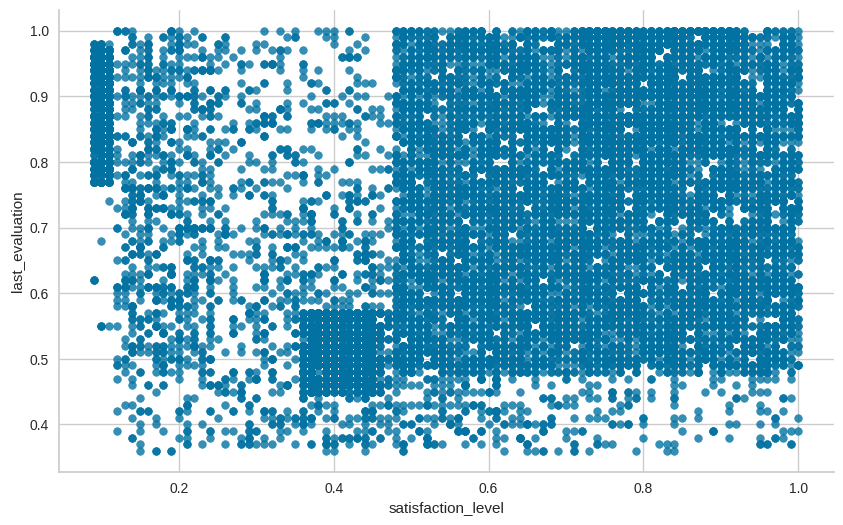

In [13]:
# @title satisfaction_level vs last_evaluation

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='satisfaction_level', y='last_evaluation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

**this graph shows the employee satisfaction level with the last evaluation (0 to 1)**

**Most employees have high evaluation AND high satisfaction.**

➤ They’re in the top-right area (close to 1 on both axes).

➤ These people are doing great and probably happy to stay.

**A big cluster of employees has low satisfaction (below 0.4) but high evaluation (above 0.8).**

➤ These are high-performing but unhappy employees.

➤ 🚨 Warning: They are the ones most likely to quit.

➤ This group is a common churn risk.

**Some employees have both low satisfaction AND low evaluation.**
➤ These people may also leave — but they’re not performing well either.

➤ Might be a case for retraining or letting go.


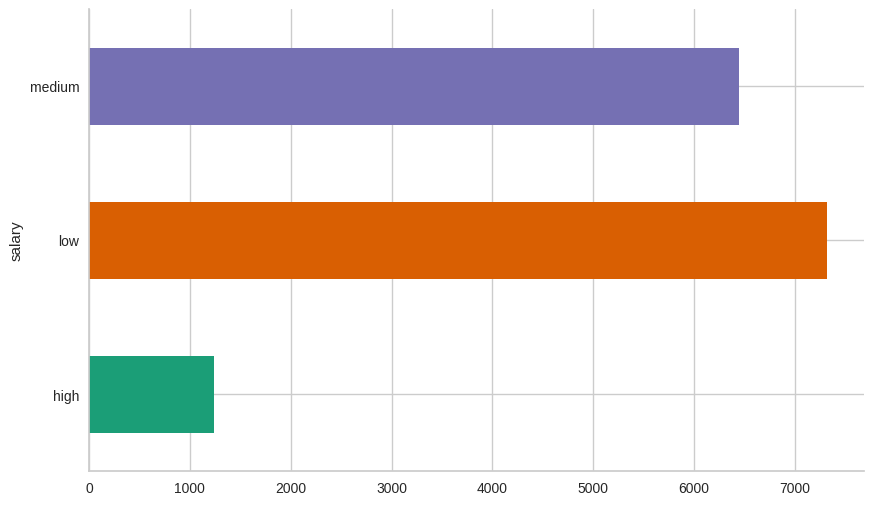

In [14]:
# @title salary

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('salary').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## This graph shows the number of employees by salary level (low, medium, high):
🔹The majority of employees have low salary.

*  This is the largest bar in the graph — a significant number of employees fall into the "low" salary range.
* 💡 This could be because the company hires a lot of entry-level or junior staff.

🔹The medium salary group is the second largest.

* A healthy number of employees are in this mid-range — likely experienced staff or specialists.

🔹The smallest group is the high salary bracket.

* These are probably managers, senior professionals, or top performers.

* ⚠️ If too few employees are in this range, it might indicate a lack of upward mobility or limited reward for experience/performance.

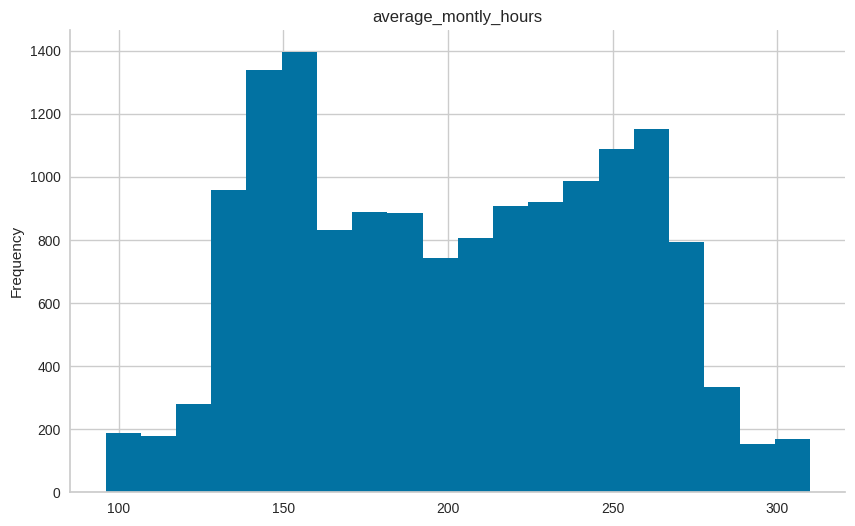

In [15]:
# @title average_montly_hours

from matplotlib import pyplot as plt
df['average_montly_hours'].plot(kind='hist', bins=20, title='average_montly_hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

## This graph shows the distribution of employees based on their average monthly working hours:
🔹 Most employees work between 140 and 160 hours/month:


*   This is the tallest bar in the histogram.

*   Represents standard full-time working hours.


*   Suggests a large group with a balanced workload.

🔹 A secondary peak appears around 250–260 hours/month:


*  Indicates another group working significantly longer hours.

*  Could suggest high workload, tight deadlines, or understaffing.

*  ⚠️ These employees might be more prone to burnout or dissatisfaction.



🔹 Fewer employees work extremely low (<120) or high (>290) hours:

*  These are likely outliers — maybe part-timers or those in special roles.

*  🚨 May indicate irregular schedules, personal constraints, or mismanagement.

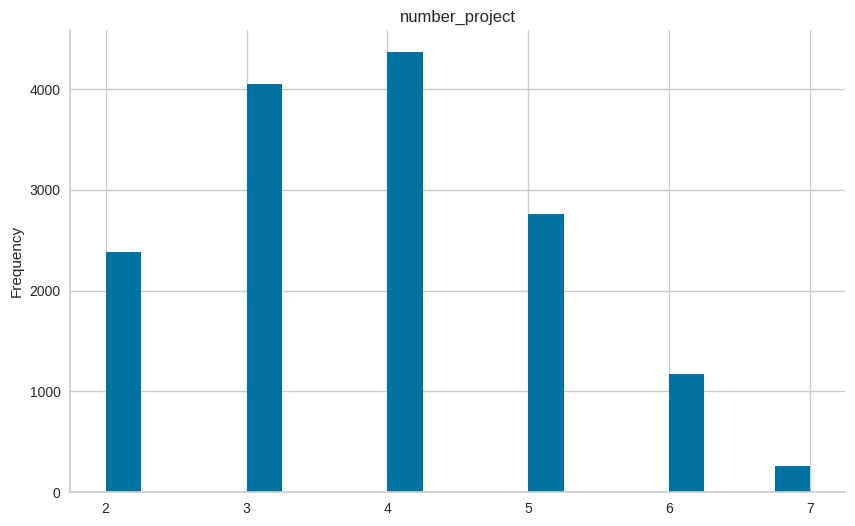

In [16]:
# @title number_project

from matplotlib import pyplot as plt
df['number_project'].plot(kind='hist', bins=20, title='number_project')
plt.gca().spines[['top', 'right',]].set_visible(False)

## This graph shows how many projects employees are typically involved in (number_project):
🔹 Most employees are involved in 3 to 4 projects:

*   These two categories dominate the graph.

*   Likely the optimal workload—balanced and manageable.

🔹 A smaller group is working on 5 or more projects:

*  This group is shrinking quickly in size as the number increases.
* ⚠️ Could indicate risk of overload, fatigue, or burnout.

🔹 Very few employees are assigned to 6 or 7 projects:

*   These are likely outliers or employees under heavy pressure.

*   🚨 Might need support or reassignment to avoid performance drop or quitting.

🔹 Only a minority are on 2 or fewer projects:

*   Could represent new hires, part-timers, or underutilized employees.

*  Opportunity to upskill or assign more responsibilities.

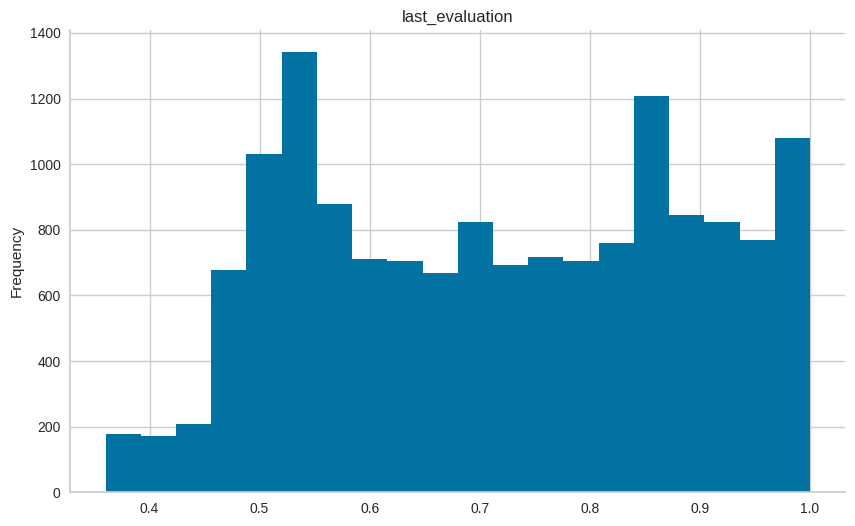

In [17]:
# @title last_evaluation

from matplotlib import pyplot as plt
df['last_evaluation'].plot(kind='hist', bins=20, title='last_evaluation')
plt.gca().spines[['top', 'right',]].set_visible(False)

## This graph shows how employees performed in their last evaluation (last_evaluation):

🔹 Most employees have scores around 0.55 and 0.85:

*   These two categories dominate the graph.

*  Likely reflect average and strong performance levels.

🔹 A large group scored close to 1.0:

*   This spike stands out clearly.

*   ⚠️ Could indicate top performers—or possible score inflation from lenient evaluations.

🔹 Many employees fall between 0.6 and 0.8:

*  This range shows steady and consistent performance.

*   Likely employees who meet expectations regularly.

🔹 Very few employees scored below 0.4:

*  This group is the smallest on the chart.

*  🚨 Could represent underperformers needing support or closer review.

🔹 Several sharp peaks instead of a smooth curve:

*   This pattern suggests structured evaluation methods.

*  Possibly due to fixed rating levels or scoring guidelines.


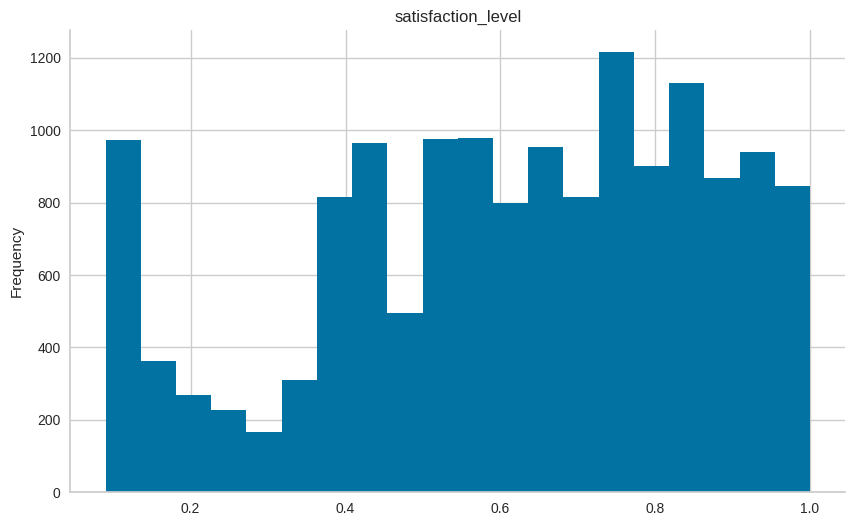

In [18]:
# @title satisfaction_level

from matplotlib import pyplot as plt
df['satisfaction_level'].plot(kind='hist', bins=20, title='satisfaction_level')
plt.gca().spines[['top', 'right',]].set_visible(False)

## This graph shows employee satisfaction levels (satisfaction_level):

🔹 A large group of employees have very low satisfaction (below 0.2):

*   This is one of the highest bars on the graph.

*   🚨 Indicates a concerning number of highly dissatisfied employees.
*   This group is likely at high risk for turnover or disengagement.


🔹 A noticeable dip around 0.2 to 0.3:

*   Fewer employees fall in this range.

*   This sudden drop may indicate a cutoff point where very dissatisfied employees either leave or their numbers are low.

🔹 Another large cluster appears between 0.4 and 0.6:

*   Represents moderately satisfied employees.

*   Likely a core group who are neither highly engaged nor disengaged—room for improvement here.
🔹 High satisfaction scores (0.7 to 0.9) are common:

*   This area shows consistent frequency.

*   Reflects a strong portion of the workforce that is likely happy and productive.

🔹 Satisfaction levels close to 1.0 also appear often, but not the highest:

*  These are the most satisfied employees, though not the largest group.

*   ⚠️ Important to retain and support them—they could be top performers or highly engaged staff.

🔹 The distribution is U-shaped with peaks at both low and high ends:

*   This suggests a divided workforce—many are either very satisfied or very dissatisfied, with fewer in between.
*    This polarization may point to uneven management, role satisfaction, or departmental issues.

<Axes: xlabel='left', ylabel='satisfaction_level'>

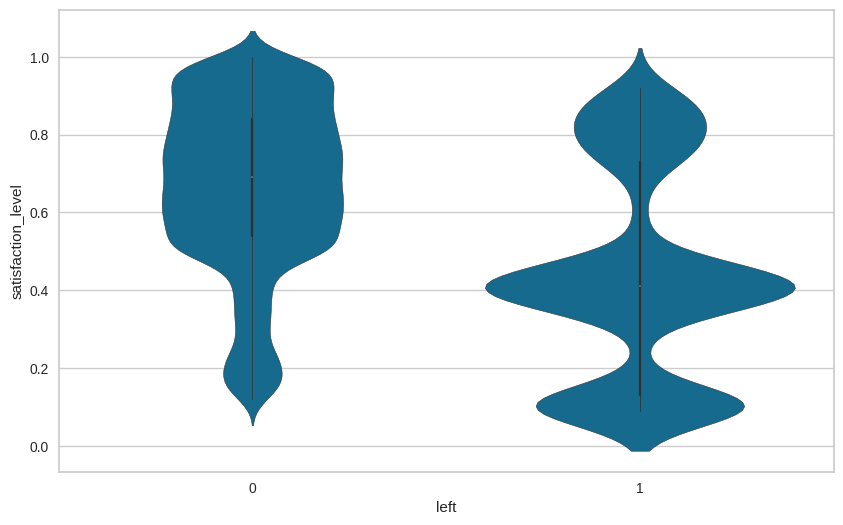

In [19]:
sns.violinplot(x='left', y='satisfaction_level', data=df)

In [20]:
y = df['left']
print(f'Percentage of left-1: % {round(y.value_counts(normalize=True)[1]*100,2)} --> \
({y.value_counts()[1]} observations for left-1)\nPercentage of left-0: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} observations for left-0)')

Percentage of left-1: % 23.81 --> (3571 observations for left-1)
Percentage of left-0: % 76.19 --> (11428 observations for left-0)


- The target column, 'left', has binary type values.
- There has been an imbalanced data for the analysis.
- Almost 23.81% of the employees prefered NOT to continue with the company and left.
- 1991 employees left.
- Almost 76.19% of the employees prefered to continue with the company and stayed.
- 10000 employees stayed

In [21]:

fig.show()

In [22]:
import plotly.graph_objects as go
import pandas as pd

# Assuming 'df' is your DataFrame
cross_tab = pd.crosstab(df['number_project'], df['left'])

# Create a bar chart using plotly.graph_objects
fig = go.Figure(data=[
    go.Bar(name='Stayed', x=cross_tab.index, y=cross_tab[0]),
    go.Bar(name='Left', x=cross_tab.index, y=cross_tab[1])
])

# Update layout for title and axis labels
fig.update_layout(barmode='group',
                  title_text='number_project and left',
                  xaxis_title='number_project',
                  yaxis_title='Count')

fig.show()

It's clear that the employees who made 2, 6 and 7 projects are more inclined to leave their works. It's normal to expect employees who made more projects but not getting more salary or feeling more satisfaction to leave their works;however, those who left even though making less projects should be scrutinized more meticulously.

---

In [23]:
object_col = []
for col in df.columns:
    if df[col].dtype == object and  len(df[col].unique()) <= 30:
        object_col.append(col)
        print(f"{col} : {df[col].unique()}")
        print(df[col].value_counts())
        print("============================================")

Departments  : ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Departments 
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64
salary : ['low' 'medium' 'high']
salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64


Saving the Numeric Data Type Data in One List

In [24]:
numeric_df =[]
for col in df.columns:
    if df[col].dtype!= object:
        numeric_df.append(col)
print(numeric_df)


['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']


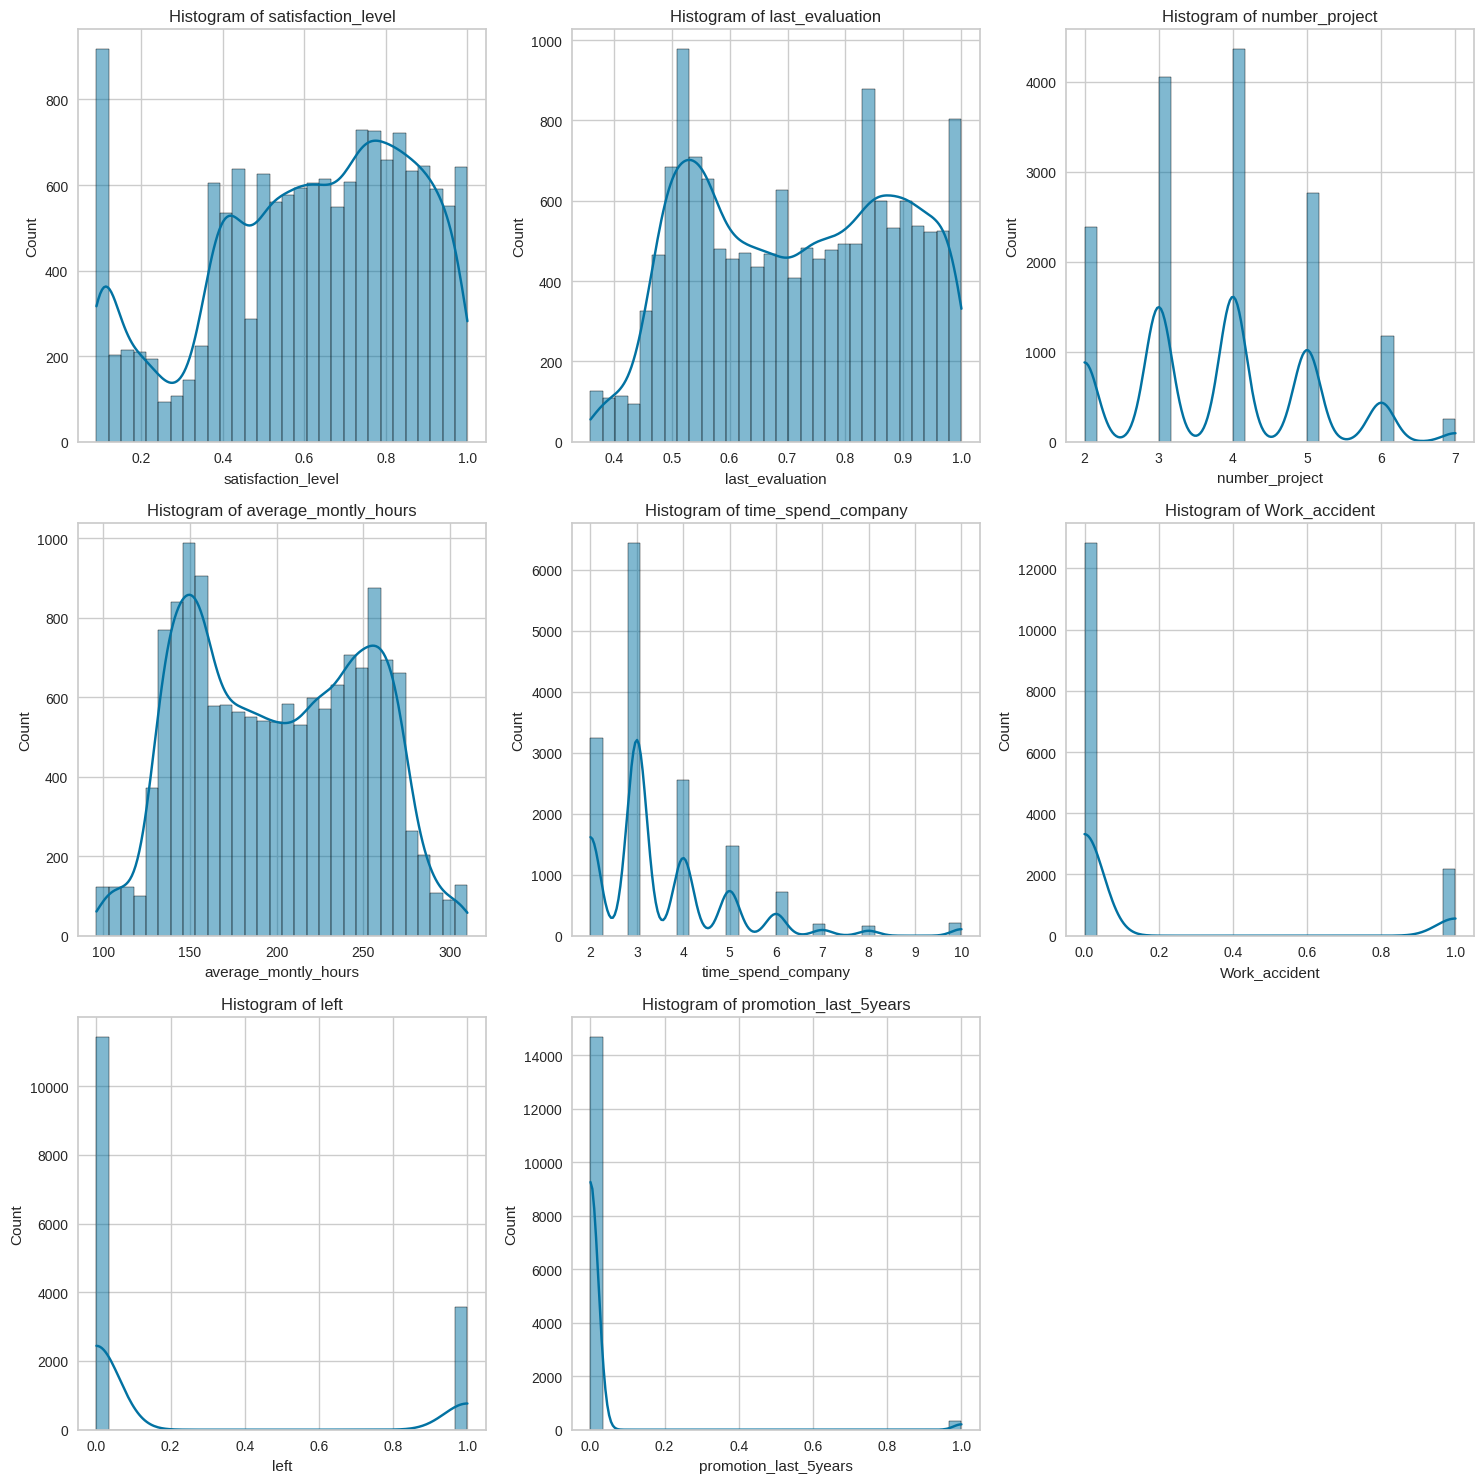

In [25]:
num_cols = len(numeric_df)
fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(15, 5 * ((num_cols // 3) + 1)))

axes = axes.flatten()  # Flatten for easy iteration

for i, col in enumerate(numeric_df):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')

# Hide empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Insights from Feature Distributions

#### 1. Satisfaction Level
- The distribution is bimodal — clusters around low and high satisfaction.
- **Insight:** There might be two distinct employee groups: one highly satisfied and another very dissatisfied. The latter is likely contributing more to attrition.

#### 2. Last Evaluation
- Peaks near 0.55 and 1.0.
- **Insight:** Employees with very high or very low evaluations may be at higher risk — high scorers might feel overworked or under-rewarded, while low scorers might be underperforming.

#### 3. Number of Projects
- Peaks at 3, 4, and 5 projects.
- A sharp drop after 6 projects.
- **Insight:** Employees with extremely high project counts (6 or 7) may be overwhelmed — possibly linked to higher attrition.

#### 4. Average Monthly Hours
- Bimodal distribution — peaks around 150 and 250 hours.
- **Insight:** There's a group of overworked employees, potentially leading to burnout and leaving. Moderate workloads seem more sustainable.

#### 5. Time Spent at Company
- Most employees spend 3–4 years.
- Sharp drop after 6 years.
- **Insight:** Employees tend to leave after 3–4 years if not promoted or sufficiently engaged.

#### 6. Work Accident
- Majority of employees have not experienced accidents.
- **Insight:** While rare, accidents may influence dissatisfaction or loyalty.

#### 7. Left (Target)
- Class imbalance: majority stayed, minority left.
- **Insight:** Indicates the need for balancing techniques (e.g., SMOTE) for fair model training.

#### 8. Promotion in Last 5 Years
- Very few employees received promotions.
- **Insight:** Indicates a lack of career progression — potentially a key factor in employee turnover.

### General Conclusion
- **Attrition** is likely driven by a combination of:
  - **Low satisfaction**
  - **Very high workload**
  - **Long tenure without promotion**
  - **Lack of career development**
- **Actionable recommendation:** Improve work-life balance, set fair project loads, and offer more promotion opportunities to reduce attrition.

---

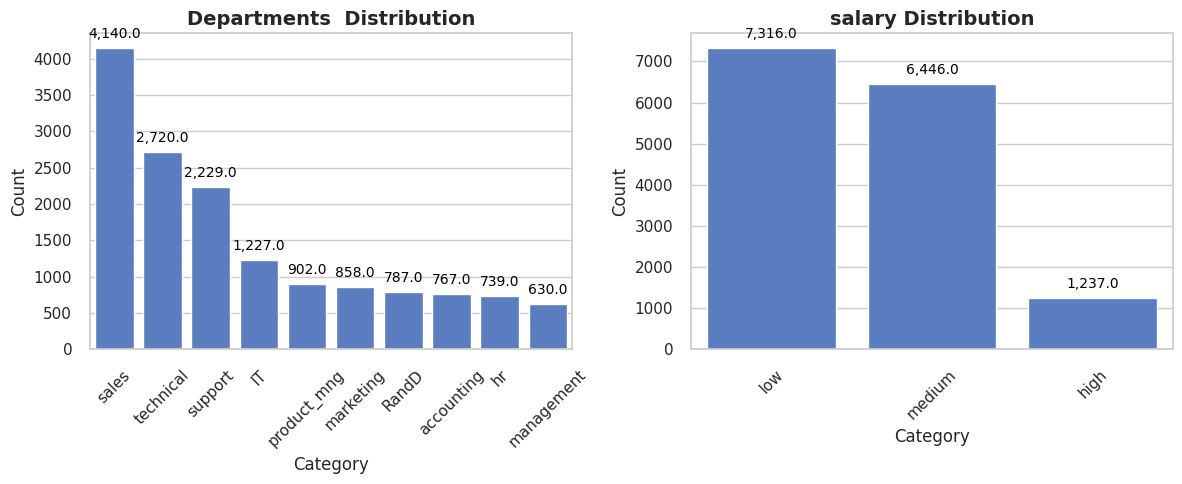

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Set a professional theme and color palette
sns.set_theme(style="whitegrid", palette="muted")

# Ensure object_col is a list of categorical columns
if isinstance(object_col, list):
    object_col = df[object_col]

cat_cols = len(object_col.columns)

# Calculate rows dynamically for a neat grid
rows = math.ceil(cat_cols / 3)
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(18, 5 * rows))

axes = axes.flatten()

# Iterate through categorical columns and plot
for i, col in enumerate(object_col.columns):
    ax = axes[i]
    # Use df_extra for both data and order to avoid KeyError
    sns.countplot(x=df[col], order=df[col].value_counts().index, ax=ax, hue=None)

    # Enhanced titles and axis labels
    ax.set_title(f'{col} Distribution', fontsize=14, fontweight='bold')
    ax.set_xlabel('Category', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

    # Rotate x-axis labels for better clarity
    ax.tick_params(axis='x', rotation=45)

    # Add count labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Hide unused subplots for cleaner output
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Insights from Categorical Feature Distributions

#### 1. Departments Distribution
- The **Sales**, **Technical**, and **Support** departments have the highest number of employees:
  - Sales: 3,239 employees
  - Technical: 2,244 employees
  - Support: 1,821 employees
- Departments like **Management**, **HR**, and **Accounting** have significantly fewer employees (each < 700).
- **Insight:** Sales and technical roles are the core of the company workforce. Analysis focused on these departments may yield the most impactful results for attrition and performance.

#### 2. Salary Distribution
- The salary distribution is **skewed toward lower levels**:
  - Low: 5,740 employees
  - Medium: 5,261 employees

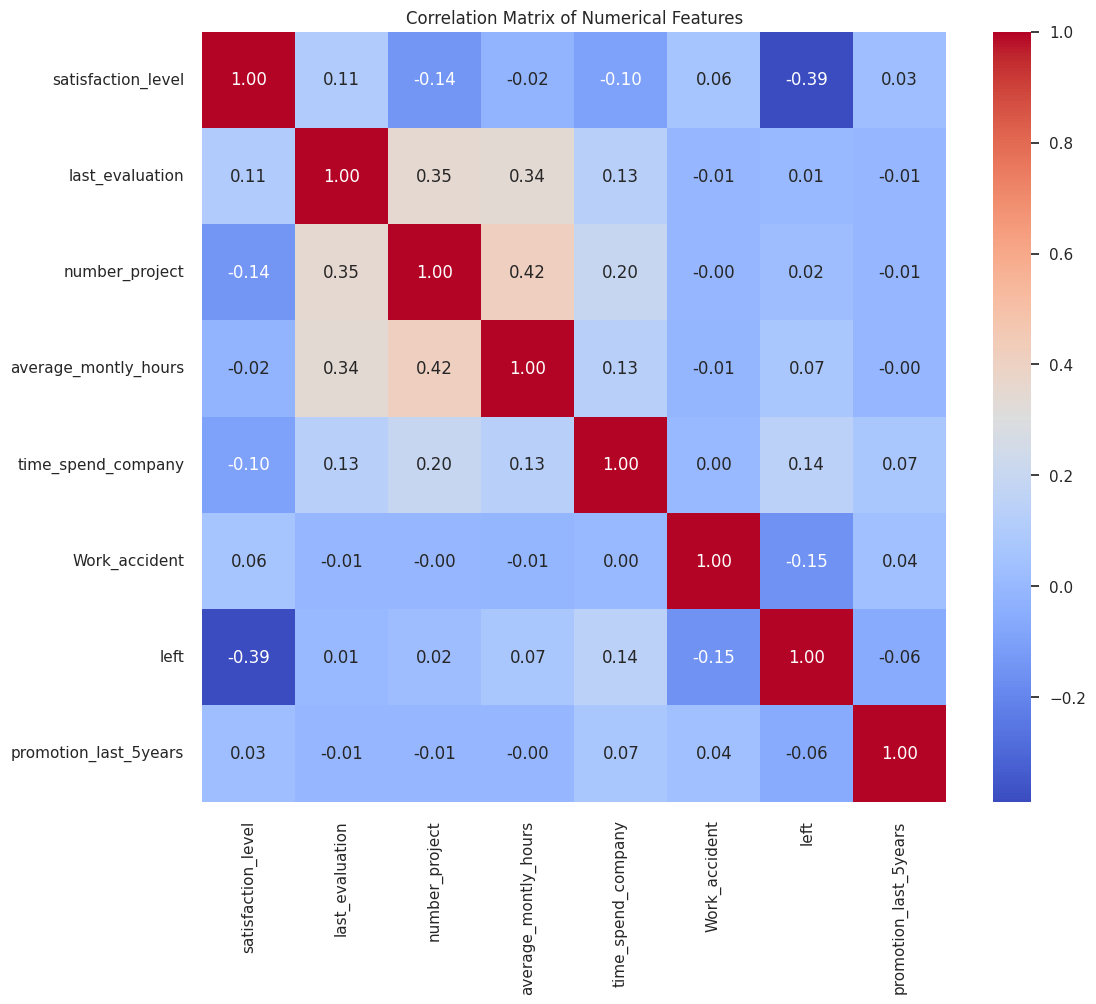

In [27]:
# Calculate the correlation matrix
df_cleaned_numeric = df.select_dtypes(include=['int64', 'float'])
correlation_matrix = df_cleaned_numeric.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Correlation Matrix of Numerical Features**

**Strongest Correlations:**

`Positive:`

number_project ↔ last_evaluation (0.35): Employees with more projects tend to get higher evaluations.

average_montly_hours ↔ number_project (0.42): More projects = more hours worked.

`Negative:`

satisfaction_level ↔ left (-0.39): Lower satisfaction strongly predicts attrition.

**Key Insights:**

`Attrition Drivers:`

Employees with low satisfaction are 39% more likely to leave.

Longer tenure (time_spend_company) correlates weakly with leaving (0.14), suggesting burnout risks over time.

Work accidents reduce attrition likelihood (-0.15), possibly due to retention policies for injured staff.

`Performance:`
High performers (last_evaluation) work on more projects and longer hours, but this doesn’t link to promotions (promotion_last_5years ≈ 0.0).

`Risk:`
Overworked employees (high hours/projects) may quit if unrecognized.

`Oddities:`
promotion_last_5years shows no correlation with performance metrics—potential issue in promotion criteria.

`Recommendations:`
Retention: Address low satisfaction (e.g., surveys, flexibility) and recognize long-tenured employees.

`Promotions:`
 Align promotions with performance (last_evaluation) and workload.

`Workload Balance:`
 Monitor employees with high number_project + average_montly_hours to prevent burnout.

In [28]:
cprint('"left" Column Distribution','green')
df.left.value_counts()

"left" Column Distribution


,count
left,
0,11428
1,3571


"left" Column Distribution


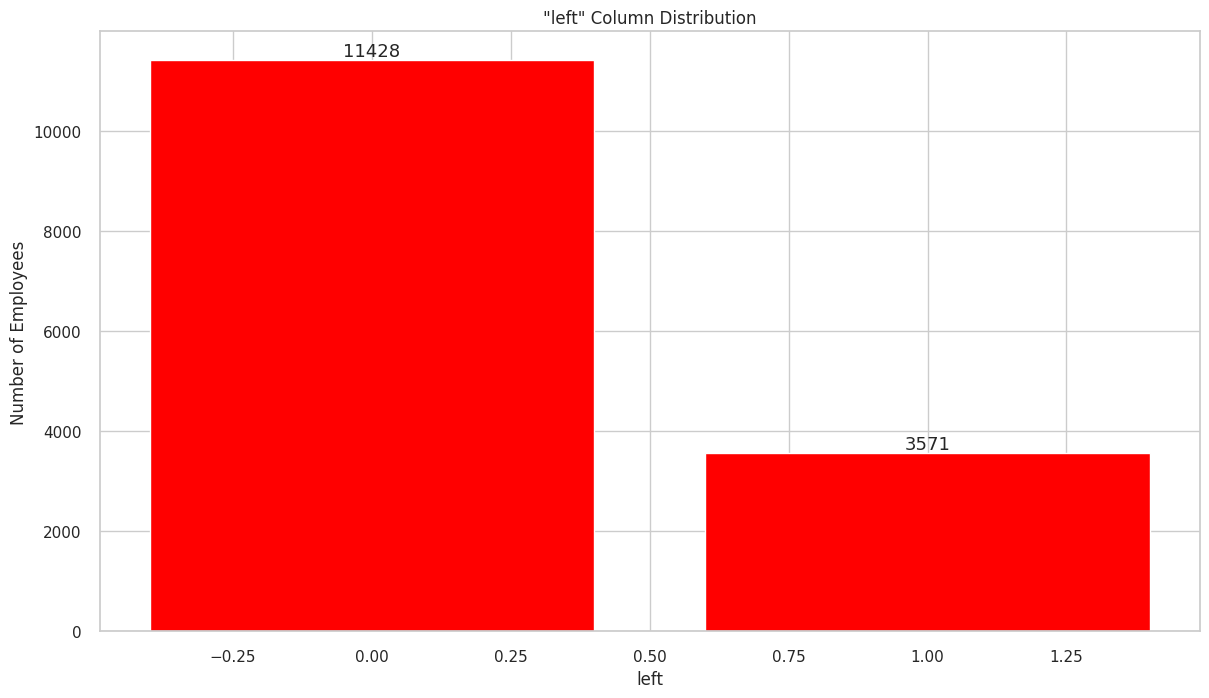

In [29]:
cprint('"left" Column Distribution','green')
fig = plt.figure(figsize = (11, 6))
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(df.left.value_counts().index, df.left.value_counts().values, color = 'red')
plt.title('"left" Column Distribution')
plt.xlabel('left')
plt.ylabel('Number of Employees')
for index,value in enumerate(df.left.value_counts()):
    plt.text(index, value, f'{value}', ha = 'center', va = 'bottom', fontsize = 13)
plt.show()

Majority of the Workers left the company Which Shows a class imbalance ( we will solve this later )

In [30]:
cprint('"number_project" Column Distribution','green')
df.number_project.value_counts()

"number_project" Column Distribution


,count
number_project,
4,4365
3,4055
5,2761
2,2388
6,1174
7,256


"number_project" Column Distribution


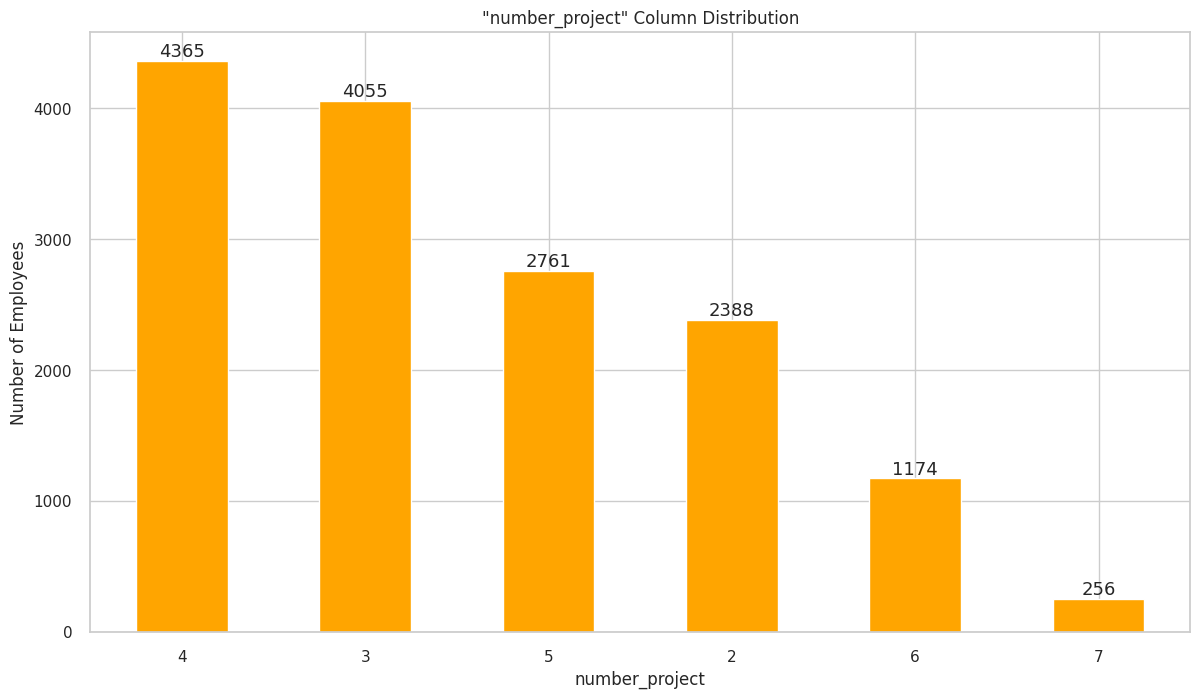

In [31]:
cprint('"number_project" Column Distribution','green')
fig = plt.figure(figsize = (11,6))
ax = fig.add_axes([0,0,1,1])
# x = df.number_project.value_counts().index
# y = df.number_project.value_counts().values
df.number_project.value_counts().plot(kind = "bar", color = "orange")
plt.title('"number_project" Column Distribution')
plt.xlabel('number_project')
plt.ylabel('Number of Employees')
plt.xticks(rotation = 0)
for index,value in enumerate(df.number_project.value_counts().sort_values(ascending=False)):
    plt.text(index, value, f'{value}', ha = 'center', va = 'bottom', fontsize = 13)
plt.show()

In [32]:
cprint('"time_spend_company" Column Distribution','green')
df.time_spend_company.value_counts()

"time_spend_company" Column Distribution


,count
time_spend_company,
3,6443
2,3244
4,2557
5,1473
6,718
10,214
7,188
8,162


"time_spend_company" Column Distribution


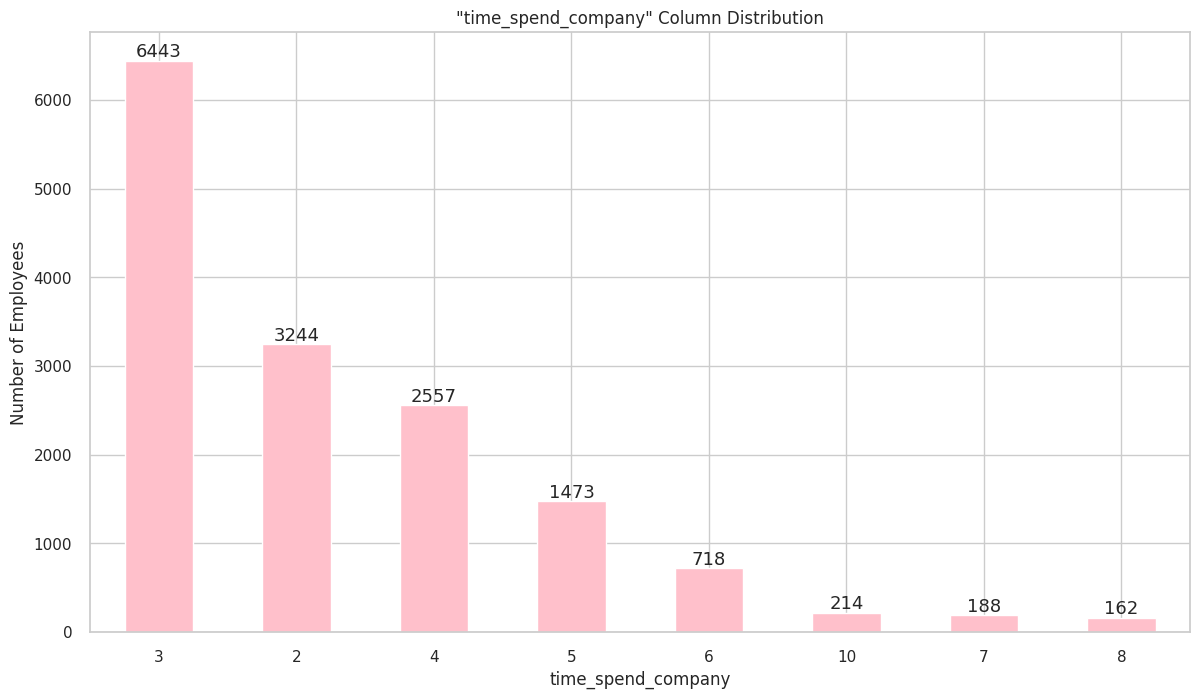

In [33]:
cprint('"time_spend_company" Column Distribution','green')
fig = plt.figure(figsize = (11,6))
ax = fig.add_axes([0,0,1,1])
df.time_spend_company.value_counts().plot(kind = "bar", color = "pink")
plt.title('"time_spend_company" Column Distribution')
plt.xlabel('time_spend_company')
plt.ylabel('Number of Employees')
plt.xticks(rotation = 0)
for index,value in enumerate(df.time_spend_company.value_counts().sort_values(ascending=False)):
    plt.text(index, value, f'{value}', ha = 'center', va = 'bottom', fontsize = 13)
plt.show()

**Key Insights:**

Peak at 3 Years:

The highest number of employees (6,443) stay for 3 years, suggesting this is a critical retention milestone.

Possible Reasons:

Career growth plateaus (e.g., lack of promotions post-3 years).

Vesting periods for benefits (e.g., stock options, bonuses).

Sharp Decline After 3 Years:

Employees drop dramatically after 3 years (3,244 at 2 years → 6,443 at 3 years → 2,557 at 4 years).

Implication:

 Significant attrition occurs post-3-year mark—likely due to unmet expectations or external opportunities.

Long-Tenure Employees (7+ Years) Are Rare:

Few employees reach 7–10 years (e.g., 188 at 7 years, 162 at 8 years).

Why? Possible "survivor bias" (only highly satisfied or specialized staff remain).

Oddity at 10 Years:

A slight uptick at 10 years (214 vs. 188 at 7 years) might reflect:

Retention incentives (e.g., sabbaticals, leadership tracks).

Data noise (small sample size).

Recommendations:

Targeted Retention for 3-Year Mark:

Conduct "stay interviews" or career path planning before Year 3.

Offer promotions/role expansions to align with tenure milestones.

Investigate Long-Tenure Drivers:

Learn why a small group stays 7+ years (e.g., culture, benefits) and replicate those conditions.

Compare with Attrition Data:

Cross-check with your correlation matrix (e.g., employees with low satisfaction and 5–6 years tenure may be high-risk).

# Data Cleaning

In [34]:
# identify the missing values
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Departments,0
salary,0


**There is no null or missing values in our data**



---
**Check for Duplications**

In [35]:

print("Duplicates :",df.duplicated().sum())

Duplicates : 3008


In [36]:
# Example: Make sure you don’t remove duplicates based only on the target column
df = df.drop_duplicates(subset=[col for col in df.columns if col != 'left'])


In [37]:
# prompt: remove duplicates from df

# Assuming 'df' is your DataFrame (as defined in the provided code)
# df = df.drop_duplicates()
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns after removing duplicates.\n")


The dataset contains 11991 rows and 10 columns after removing duplicates.



### Identify Outliers in the Dataset

We'll use two standard methods to detect outliers:

***Z-Score Method:*** Identifies how many standard deviations a value is from the mean.

***IQR (Interquartile Range) Method:*** Captures outliers beyond 1.5 times the interquartile range.


Detect outliers using IQR for all numerical features.

Visualize the outliers using **boxplots** for a clear understanding.

Decide whether to remove or transform the outliers.

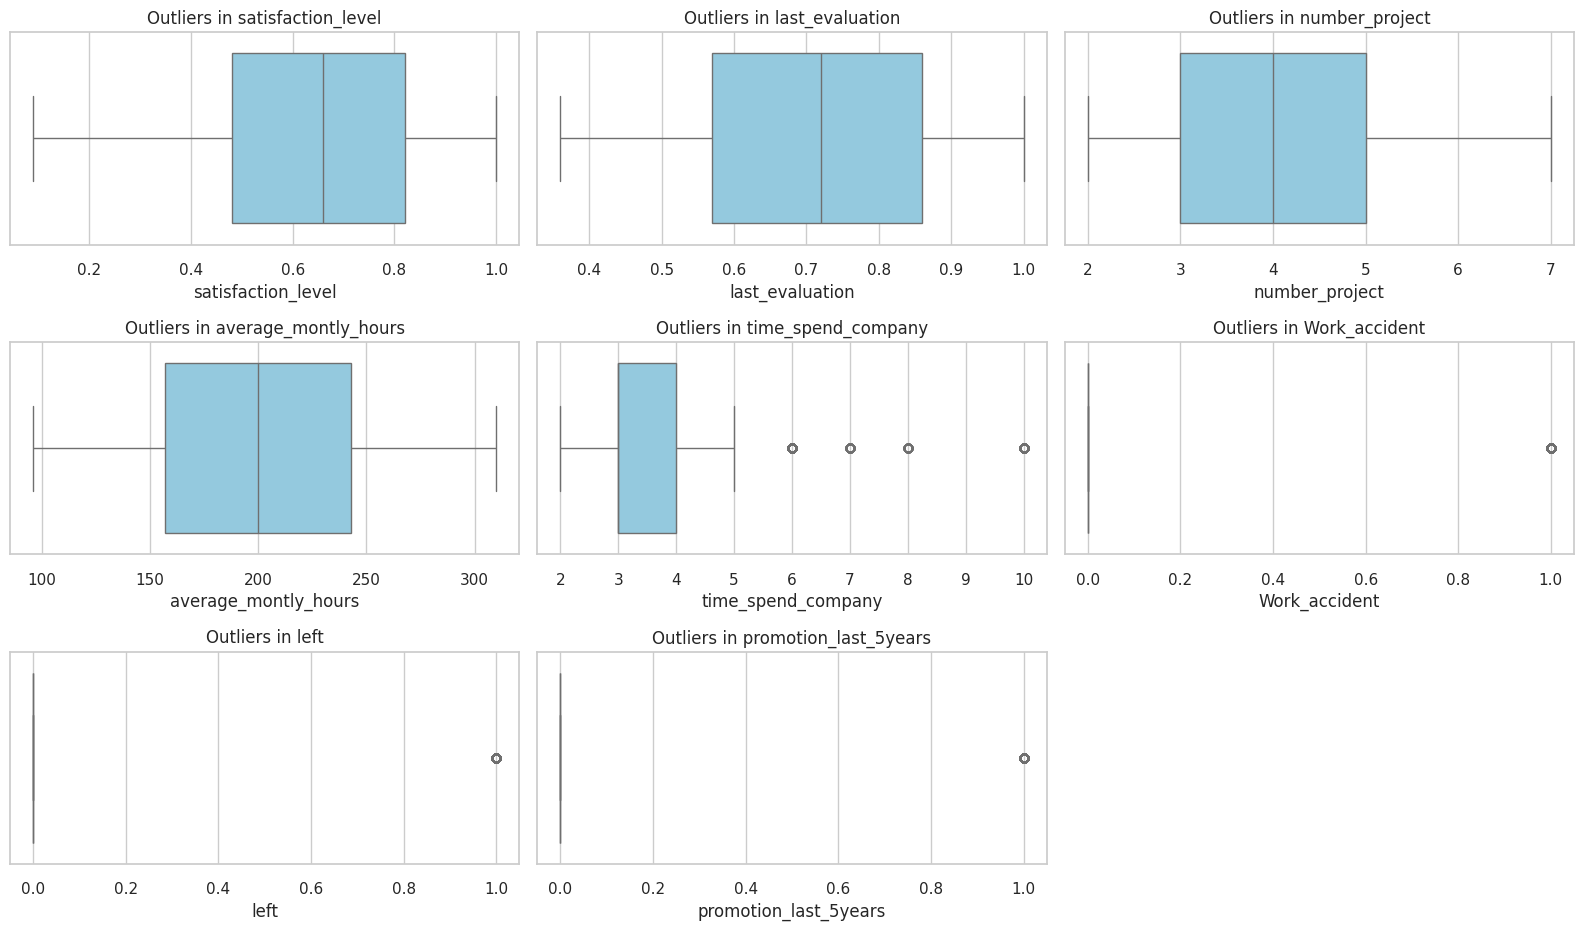

{'satisfaction_level': 0,
 'last_evaluation': 0,
 'number_project': 0,
 'average_montly_hours': 0,
 'time_spend_company': 824,
 'Work_accident': 1850,
 'left': 1991,
 'promotion_last_5years': 203}

In [38]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers

# Detect outliers
outliers = detect_outliers_iqr(df, numeric_df)

# Visualize outliers using boxplots
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_df, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Outliers in {col}')
plt.tight_layout()
plt.show()

# Count of outliers per column
outlier_counts = {col: len(outliers[col]) for col in numeric_df}
outlier_counts

In [39]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.380,0.530,2,157,3,0,1,0,sales,low
1,0.800,0.860,5,262,6,0,1,0,sales,medium
2,0.110,0.880,7,272,4,0,1,0,sales,medium
3,0.720,0.870,5,223,5,0,1,0,sales,low
4,0.370,0.520,2,159,3,0,1,0,sales,low


In [40]:
df.shape

(11991, 10)

# Statistical TESTS

## 🔍 1. T-Test Insight
✨ What it tests:

Compares the mean of a numerical feature between two groups (e.g., employees who left vs. those who stayed).

In [41]:
from scipy.stats import ttest_ind

# Example: T-test for satisfaction_level between 'left' and 'stayed'
left_group = df[df['left'] == 1]['satisfaction_level']
stayed_group = df[df['left'] == 0]['satisfaction_level']

t_stat, p_val = ttest_ind(left_group, stayed_group)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_val:.4f}")


T-Statistic: -40.9850
P-Value: 0.0000


📈 Interpretation:
If p-value < 0.05 → there’s a significant difference in satisfaction levels between employees who left and those who stayed.

If p-value ≥ 0.05 → no significant difference.

💡 Insight:
“Employees who left the company had a significantly lower satisfaction level than those who stayed (p < 0.05). Satisfaction level might be a strong predictor for attrition.”

## 🔍 2. ANOVA Insight
✨ What it tests:
Checks if the mean of a numerical feature (e.g., satisfaction) is different across multiple categories (e.g., departments).

In [42]:
from scipy.stats import f_oneway

groups = [df[df['Departments '] == dept]['satisfaction_level'] for dept in df['Departments '].unique()]
f_stat, p_val = f_oneway(*groups)

print(f"F-Statistic: {f_stat:.4f}")
print(f"P-Value: {p_val:.4f}")


F-Statistic: 0.8334
P-Value: 0.5852


📈 Interpretation:

If p-value < 0.05 → at least one department has a significantly different average satisfaction level.



💡 Insight:

“There is no significant difference in satisfaction level between employees in different departments (p > 0.05). This suggests that satisfaction is relatively consistent across departments, and department-specific policies may not be the key factor influencing satisfaction.

## 🔍 3. Chi-Square Test Insight
✨ What it tests:
Determines if two categorical features are related (e.g., Departments and left).

In [43]:
from scipy.stats import chi2_contingency

# Example: Is attrition related to department?
contingency_table = pd.crosstab(df['left'], df['Departments '])
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2:.4f}")
print(f"P-Value: {p_val:.4f}")


Chi2 Statistic: 20.8575
P-Value: 0.0133


📈 Interpretation:

If p-value < 0.05 → there's a relationship between the two categorical variables.

Meaning: the probability of leaving depends on the department.

💡 Insight:

“Attrition is significantly associated with the department (p < 0.05). Certain departments may have higher turnover rates and need targeted retention strategies.”

# 📊 Employee Attrition Analysis: Conclusions, Problems & Solutions

---

## 🔹 1. Low Satisfaction Level Leads to Attrition

- **Insight:**  
  T-test shows a significant difference in `satisfaction_level` between employees who left and those who stayed (**p < 0.05**).

- **Problem:**  
  Low satisfaction is a major factor in employee attrition.

- **Solution:**  
  - Conduct regular satisfaction surveys and gather real-time feedback.
  - Launch employee engagement and team-building initiatives.
  - Offer flexible work options and improve workplace culture.

---

## 🔹 2. Satisfaction is Similar Across Departments

- **Insight:**  
  ANOVA shows no significant difference in `satisfaction_level` across departments (**p > 0.05**).

- **Problem:**  
  Satisfaction issues are likely **company-wide**, not department-specific.

- **Solution:**  
  - Implement organization-wide satisfaction and engagement strategies.
  - Focus on leadership training and inclusive workplace culture.

---

## 🔹 3. Department Impacts Attrition

- **Insight:**  
  Chi-square test shows a significant relationship between `Departments` and `left` (**p < 0.05**).

- **Problem:**  
  Certain departments may experience **higher turnover rates**.

- **Solution:**  
  - Identify stressors and workload issues in high-attrition departments.
  - Apply targeted retention policies: bonuses, mentoring, automation tools.

---

## 🔹 4. Overtime and Burnout

- **Insight:**  
  Employees with high `average_montly_hours` tend to leave more often.

- **Problem:**  
  **Burnout** from long working hours.

- **Solution:**  
  - Promote a healthy work-life balance.
  - Limit mandatory overtime and encourage taking time off.

---

## 🔹 5. Lack of Promotion Opportunities

- **Insight:**  
  Very few employees received promotions in the last 5 years (`promotion_last_5years`).

- **Problem:**  
  Lack of career growth may lead to demotivation and attrition.

- **Solution:**  
  - Define clear promotion paths and internal mobility programs.
  - Provide leadership training and skill development opportunities.

---

## 🔹 6. Longer Tenure Increases Attrition Risk

- **Insight:**  
  Employees with 3+ years (`time_spend_company`) at the company show higher attrition.

- **Problem:**  
  Long-term employees may feel **stagnant** or **undervalued**.

- **Solution:**  
  - Conduct regular career reviews for senior employees.
  - Offer new roles, training, and growth opportunities.

---

### 🧾 Summary Table

| 🧩 Problem                          | 🔍 Insight                                | 🛠️ Solution                                               |
|-----------------------------------|-------------------------------------------|-----------------------------------------------------------|
| Low satisfaction                  | T-test: significant difference in satisfaction | Boost engagement, feedback, and flexibility               |
| Company-wide satisfaction issue   | ANOVA: no difference between departments  | Apply general HR improvements                            |
| Department-specific attrition     | Chi-square: department affects attrition  | Focused retention strategies per department              |
| Burnout from long hours           | High average monthly hours                | Encourage balance, limit overtime                        |
| Lack of growth opportunities      | Few promotions over 5 years               | Define career paths and promote internal mobility        |
| Tenured employees leaving         | Longer time in company correlates with attrition | Refresh roles, training, and career progress meetings     |

---



# Data Preprocessing

In [44]:
df1 = df.drop('left', axis = 1)
df1.head(1)# we droped target colomn

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,0.380,0.530,2,157,3,0,0,sales,low


In [45]:
df1 = pd.get_dummies(df1, columns = ['Departments ','salary'], drop_first = True)
df1.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments _RandD,Departments _accounting,Departments _hr,Departments _management,Departments _marketing,Departments _product_mng,Departments _sales,Departments _support,Departments _technical,salary_low,salary_medium
0,0.380,0.530,2,157,3,0,0,False,False,False,False,False,False,True,False,False,True,False


In [46]:
X = df1
y = df['left']

In [47]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments _RandD,Departments _accounting,Departments _hr,Departments _management,Departments _marketing,Departments _product_mng,Departments _sales,Departments _support,Departments _technical,salary_low,salary_medium
0,0.380,0.530,2,157,3,0,0,False,False,False,False,False,False,True,False,False,True,False
1,0.800,0.860,5,262,6,0,0,False,False,False,False,False,False,True,False,False,False,True
2,0.110,0.880,7,272,4,0,0,False,False,False,False,False,False,True,False,False,False,True
3,0.720,0.870,5,223,5,0,0,False,False,False,False,False,False,True,False,False,True,False
4,0.370,0.520,2,159,3,0,0,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.900,0.550,3,259,10,1,1,False,False,False,True,False,False,False,False,False,False,False
11996,0.740,0.950,5,266,10,0,1,False,False,False,True,False,False,False,False,False,False,False
11997,0.850,0.540,3,185,10,0,1,False,False,False,True,False,False,False,False,False,False,False
11998,0.330,0.650,3,172,10,0,1,False,False,False,False,True,False,False,False,False,False,False


In [48]:
y

,left
0,1
1,1
2,1
3,1
4,1
...,...
11995,0
11996,0
11997,0
11998,0


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 42)

In [50]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
# Function to display the Confusion Matrix With Details

def ConfusionMatrix(model, X_test, y_test):
  cf_matrix = confusion_matrix(y_test, y_pred)

  group_names = ["True Negatives (TN)", "False Positives (FP)\n(Type I Error)", "False Negatives (FN)\n(Type II Error)", "True Positives (TP)"]

  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]

  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]

  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names, group_counts, group_percentages)]

  labels = np.asarray(labels).reshape(2, 2)

  ax = sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")
  ax.set(xlabel="Predicted Class", ylabel = "Actual Claass");

In [52]:
# Function to Evaluate the model

def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    ConfusionMatrix(model, X_test, y_test)


# Befor SMOTE Method

Logistic Regression
------------------
[[2882  119]
 [ 472  125]]
Test_Set
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      3001
           1       0.51      0.21      0.30       597

    accuracy                           0.84      3598
   macro avg       0.69      0.58      0.60      3598
weighted avg       0.80      0.84      0.81      3598

Train_Set
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      6999
           1       0.50      0.20      0.29      1394

    accuracy                           0.83      8393
   macro avg       0.68      0.58      0.60      8393
weighted avg       0.80      0.83      0.80      8393



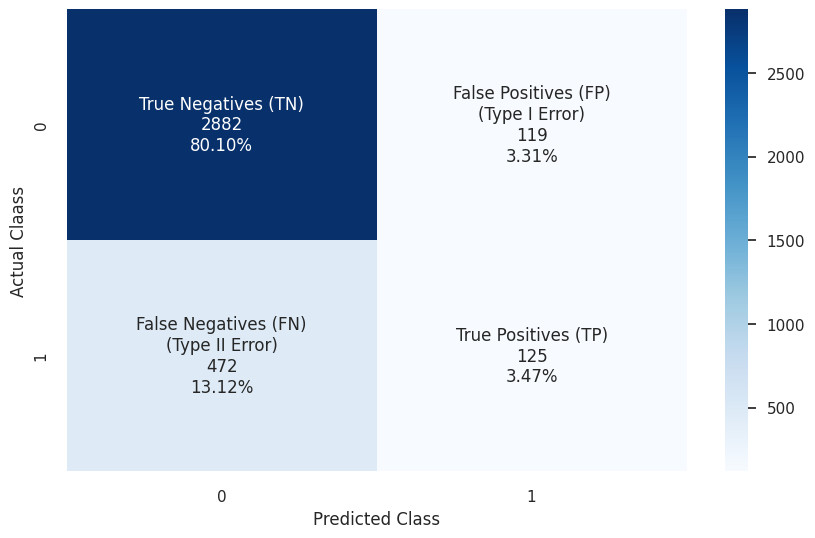

In [53]:
# from sklearn.ensemble import RegressorChain
from sklearn.linear_model import LogisticRegression

LG_model = LogisticRegression(random_state = 42)
LG_model.fit(X_train, y_train)
y_pred = LG_model.predict(X_test)
y_train_pred = LG_model.predict(X_train)

LG_model_f1 = f1_score(y_test, y_pred)
LG_model_acc = accuracy_score(y_test, y_pred)
LG_model_recall = recall_score(y_test, y_pred)
print("Logistic Regression")
print ("------------------")
eval(LG_model, X_train, X_test)

# After Applying SMOTE Method To Handle Imbalance Class

In [54]:
X = df1
y = df['left']

In [55]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X, y = smote.fit_resample(X, y)

# Check the resampled class distribution
print(pd.Series(y).value_counts())

left
1    10000
0    10000
Name: count, dtype: int64


In [56]:
print(pd.Series(y).value_counts())

left
1    10000
0    10000
Name: count, dtype: int64


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 42)

In [58]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression
------------------
[[2442  558]
 [ 434 2566]]
Test_Set
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      3000
           1       0.82      0.86      0.84      3000

    accuracy                           0.83      6000
   macro avg       0.84      0.83      0.83      6000
weighted avg       0.84      0.83      0.83      6000

Train_Set
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      7000
           1       0.82      0.85      0.84      7000

    accuracy                           0.83     14000
   macro avg       0.83      0.83      0.83     14000
weighted avg       0.83      0.83      0.83     14000



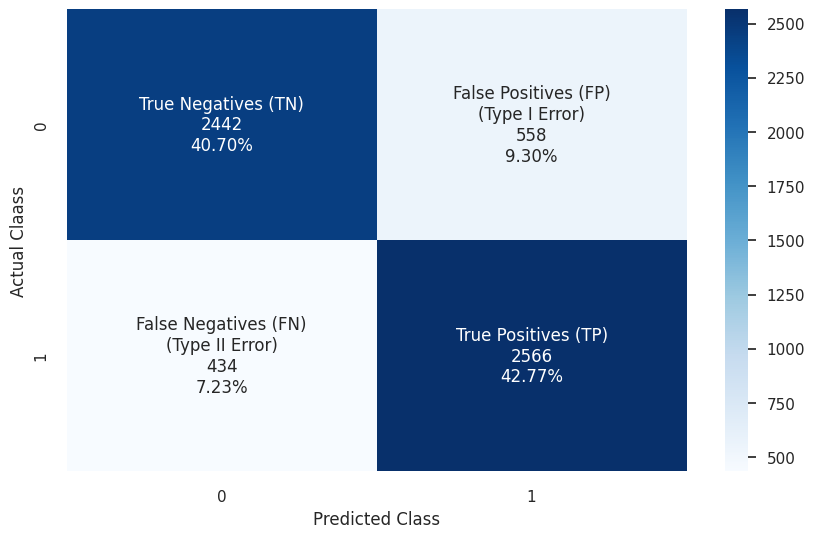

In [59]:
# from sklearn.ensemble import RegressorChain
from sklearn.linear_model import LogisticRegression

LG_model = LogisticRegression(random_state = 42)
LG_model.fit(X_train, y_train)
y_pred = LG_model.predict(X_test)
y_train_pred = LG_model.predict(X_train)

LG_model_f1 = f1_score(y_test, y_pred)
LG_model_acc = accuracy_score(y_test, y_pred)
LG_model_recall = recall_score(y_test, y_pred)
print("Logistic Regression")
print ("------------------")
eval(LG_model, X_train, X_test)

[LightGBM] [Info] Number of positive: 7000, number of negative: 7000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 14000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LGBM_Model
------------------
[[2968   32]
 [  98 2902]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3000
           1       0.99      0.97      0.98      3000

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000

Train_Set
              precision    recall  f1-score   support

           0       0.98      1.00      0.9

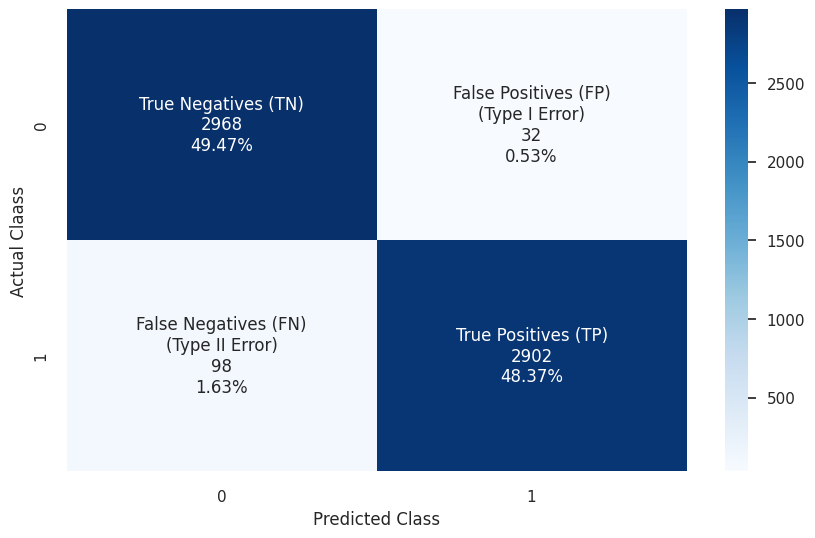

In [60]:
from lightgbm import LGBMClassifier

LGBM_model = LGBMClassifier(random_state = 42)
LGBM_model.fit(X_train, y_train)
y_pred = LGBM_model.predict(X_test)
y_train_pred = LGBM_model.predict(X_train)
print("LGBM_Model")
print ("------------------")
eval(LGBM_model, X_train, X_test)

XGB_Model
------------------
[[2959   41]
 [  94 2906]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3000
           1       0.99      0.97      0.98      3000

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000

Train_Set
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7000
           1       1.00      0.99      1.00      7000

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000



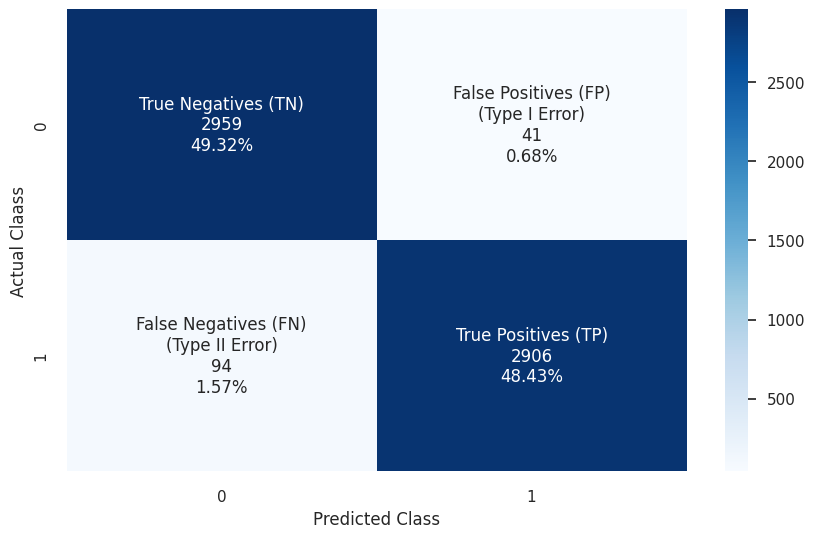

In [61]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier(random_state = 42)
XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)
y_train_pred = XGB_model.predict(X_train)
print("XGB_Model")
print ("------------------")
eval(XGB_model, X_train, X_test)

DT_Model
------------------
[[2867  133]
 [ 119 2881]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3000
           1       0.96      0.96      0.96      3000

    accuracy                           0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7000
           1       1.00      1.00      1.00      7000

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000



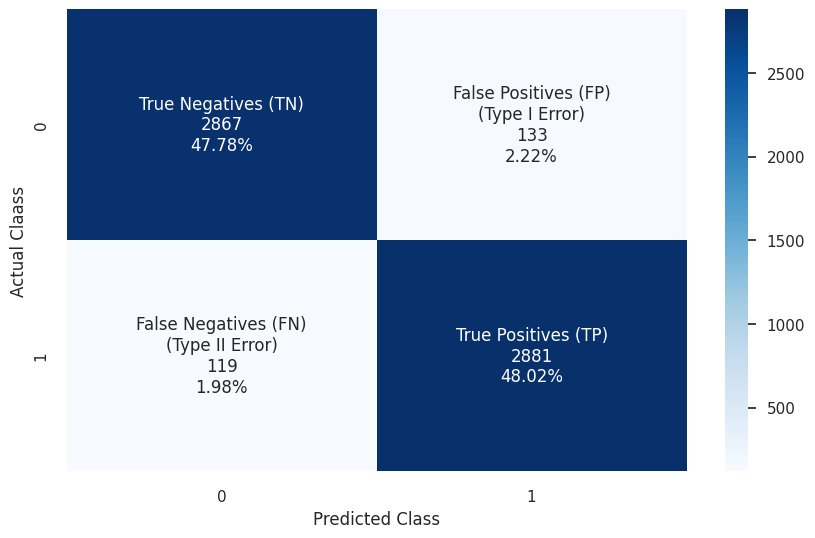

In [62]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(random_state = 42)
DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)
y_train_pred = DT_model.predict(X_train)
print("DT_Model")
print ("------------------")
eval(DT_model, X_train, X_test)

KNN_Model
------------------
[[2832  168]
 [ 125 2875]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3000
           1       0.94      0.96      0.95      3000

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      7000
           1       0.96      0.97      0.96      7000

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



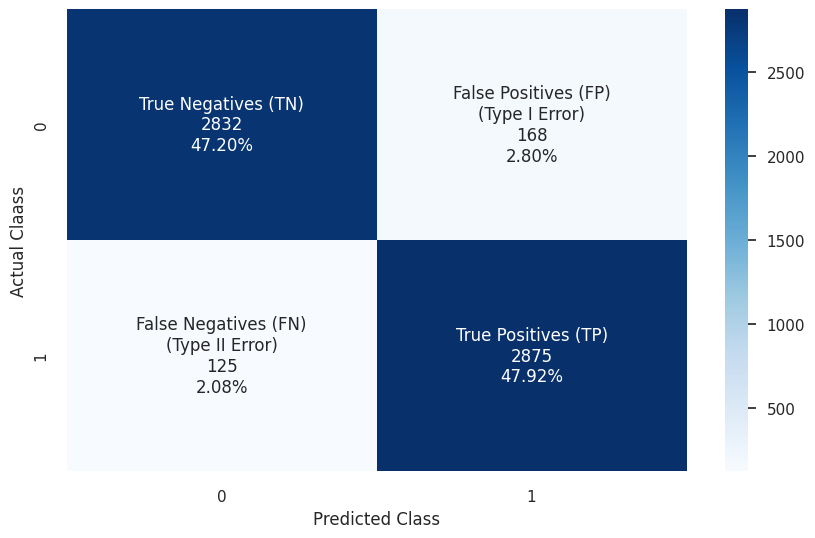

In [63]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)
y_pred = KNN_model.predict(X_test)
y_train_pred = KNN_model.predict(X_train)
print("KNN_Model")
print ("------------------")
eval(KNN_model, X_train, X_test)

GB_Model
------------------
[[2930   70]
 [ 148 2852]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3000
           1       0.98      0.95      0.96      3000

    accuracy                           0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7000
           1       0.98      0.95      0.97      7000

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



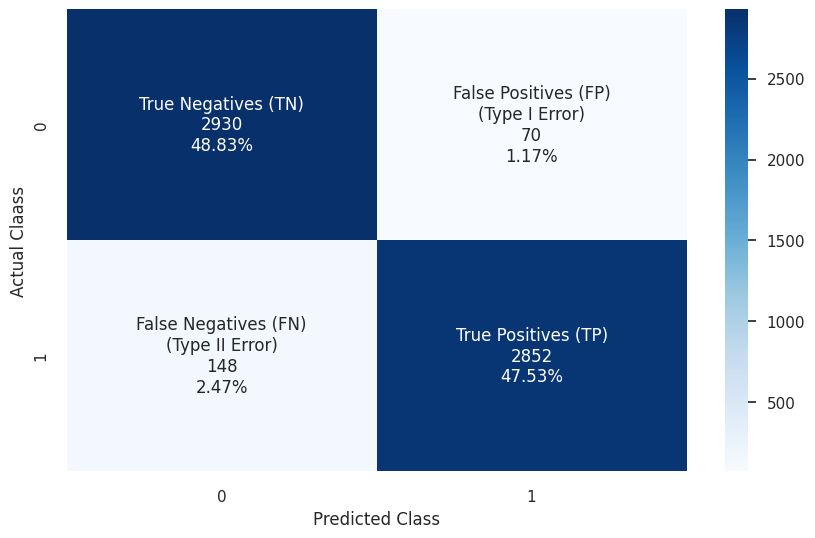

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier(random_state = 42)
GB_model.fit(X_train, y_train)
y_pred = GB_model.predict(X_test)
y_train_pred = GB_model.predict(X_train)

GB_model_f1 = f1_score(y_test, y_pred)
GB_model_acc = accuracy_score(y_test, y_pred)
GB_model_recall = recall_score(y_test, y_pred)
GB_model_auc = roc_auc_score(y_test, y_pred)
print("GB_Model")
print ("------------------")
eval(GB_model, X_train, X_test)

RF_Model
------------------
[[2980   20]
 [ 121 2879]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3000
           1       0.99      0.96      0.98      3000

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7000
           1       1.00      1.00      1.00      7000

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000



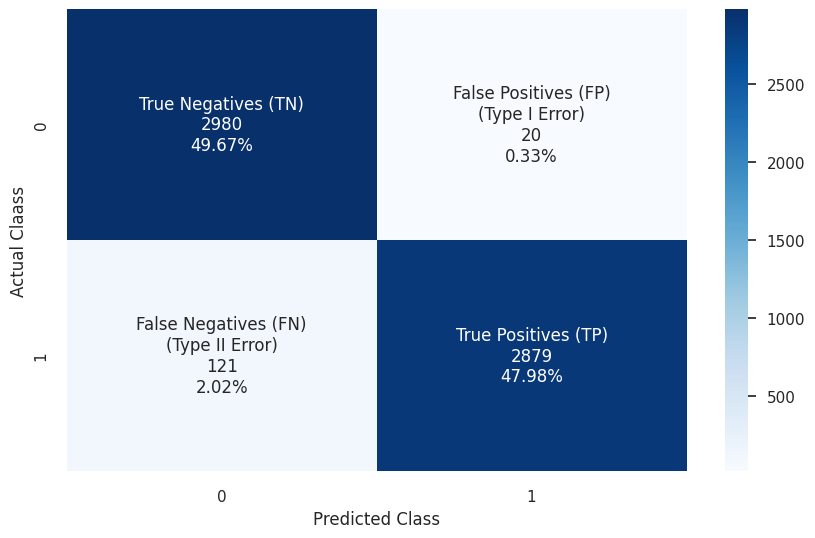

In [65]:
RF_model = RandomForestClassifier(class_weight = "balanced", random_state = 101)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
y_train_pred = RF_model.predict(X_train)

RF_model_f1 = f1_score(y_test, y_pred)
RF_model_acc = accuracy_score(y_test, y_pred)
RF_model_recall = recall_score(y_test, y_pred)
RF_model_auc = roc_auc_score(y_test, y_pred)
print("RF_Model")
print ("------------------")
eval(RF_model, X_train, X_test)

In [66]:
# Redefine models after importing CatBoost
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "LightGBM": LGBMClassifier(random_state = 42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Run and compare models
evaluation_metrics = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    evaluation_metrics[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

# Convert to DataFrame for better comparison
comparison_df = pd.DataFrame(evaluation_metrics).T.sort_values(by="F1 Score", ascending=False)
comparison_df

[LightGBM] [Info] Number of positive: 7000, number of negative: 7000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 14000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Accuracy,Precision,Recall,F1 Score
LightGBM,0.978,0.989,0.967,0.978
XGBoost,0.978,0.986,0.969,0.977
Random Forest,0.978,0.993,0.962,0.977
Gradient Boosting,0.964,0.976,0.951,0.963
Decision Tree,0.958,0.955,0.960,0.958
K-Nearest Neighbors,0.951,0.945,0.958,0.952
Logistic Regression,0.835,0.821,0.855,0.838


[LightGBM] [Info] Number of positive: 7000, number of negative: 7000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 14000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Voting Classifier
------------------
[[2965   35]
 [  94 2906]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3000
           1       0.99      0.97      0.98      3000

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000

Train_Set
              precision    recall  f1-score   support

           0       0.99      1.00  

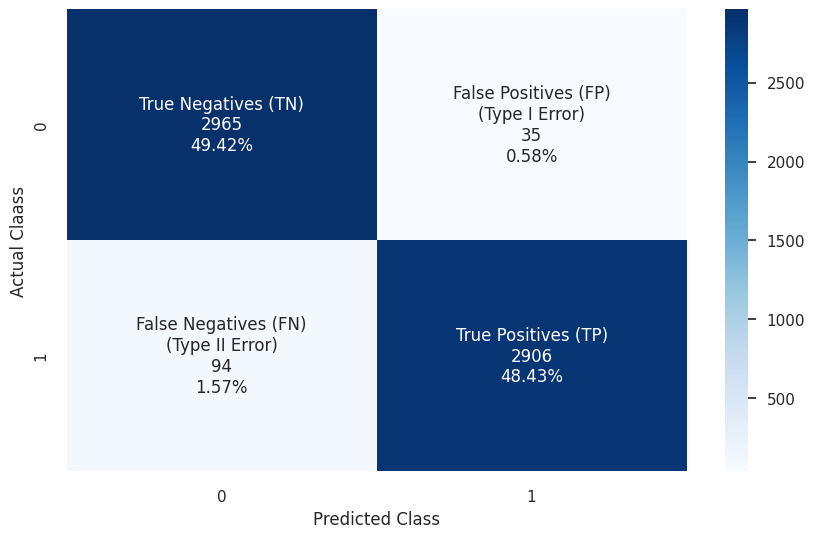

In [67]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators = [
        ('LGBM', LGBM_model),
        ('XGB', XGB_model),
        ('RF_model', RF_model),
        ('DT', DT_model),
        ('KNN', KNN_model),
        ('GB', GB_model)
    ],
    voting= 'soft'
)

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
y_train_pred = voting_clf.predict(X_train)

print("Voting Classifier")
print ("------------------")
eval(voting_clf, X_train, X_test)

In [68]:
# Redefine models after importing CatBoost
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "LightGBM": LGBMClassifier(random_state = 42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Voting Classifier": voting_clf
}

# Run and compare models
evaluation_metrics = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    evaluation_metrics[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

# Convert to DataFrame for better comparison
comparison_df = pd.DataFrame(evaluation_metrics).T.sort_values(by="F1 Score", ascending=False)
comparison_df

[LightGBM] [Info] Number of positive: 7000, number of negative: 7000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 14000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 7000, number of negative: 7000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 14000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Accuracy,Precision,Recall,F1 Score
Voting Classifier,0.979,0.988,0.969,0.978
LightGBM,0.978,0.989,0.967,0.978
XGBoost,0.978,0.986,0.969,0.977
Random Forest,0.977,0.993,0.960,0.976
Gradient Boosting,0.964,0.976,0.951,0.963
Decision Tree,0.959,0.957,0.961,0.959
K-Nearest Neighbors,0.951,0.945,0.958,0.952
Logistic Regression,0.835,0.821,0.855,0.838


In [69]:
RF_feature_imp = pd.DataFrame(index=X.columns, data = RF_model.feature_importances_, columns = ['Importance']).sort_values("Importance", ascending = False)
RF_feature_imp

,Importance
satisfaction_level,0.274
time_spend_company,0.218
average_montly_hours,0.156
last_evaluation,0.133
number_project,0.128
Work_accident,0.026
salary_medium,0.014
salary_low,0.012
Departments _technical,0.007
Departments _support,0.007


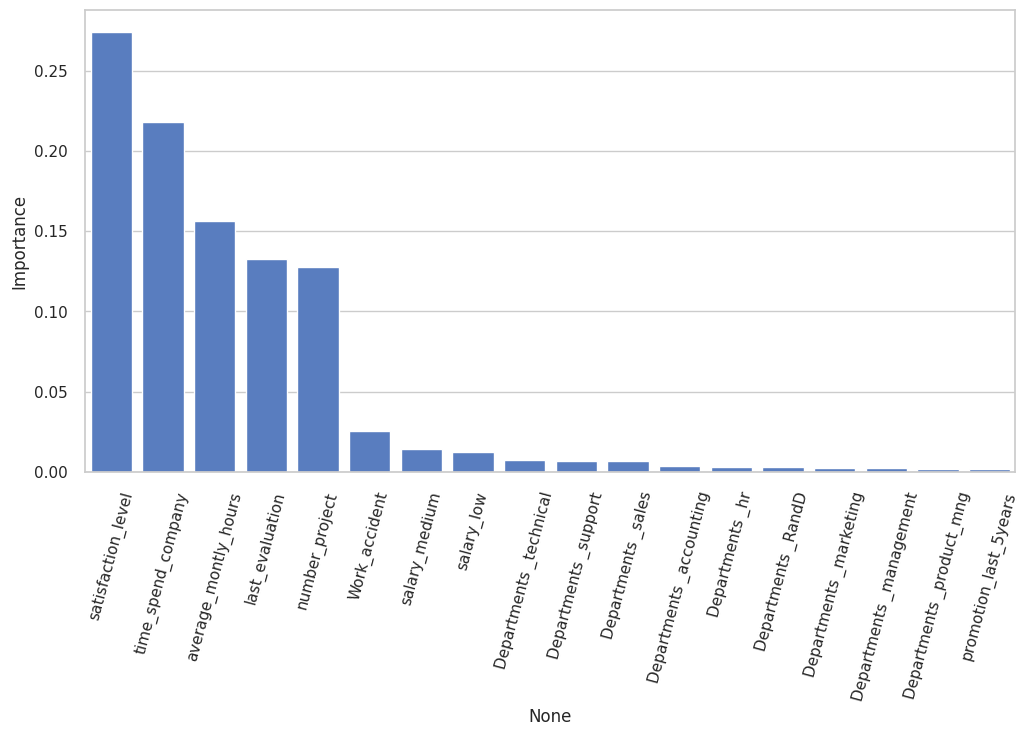

In [70]:
plt.figure(figsize = (12, 6))
sns.barplot(data = RF_feature_imp.sort_values('Importance', ascending = False), x = RF_feature_imp.sort_values('Importance', ascending = False).index, y = 'Importance')
plt.xticks(rotation = 75);

In [71]:
import joblib

# Save the trained Random Forest model
joblib.dump(RF_model, 'RF.pkl')
joblib.dump(LGBM_model, 'LGBM.pkl')
joblib.dump(DT_model, 'DT.pkl')
joblib.dump(KNN_model, 'KNN.pkl')
joblib.dump(LG_model, 'LG.pkl')
joblib.dump(GB_model, 'GB.pkl')
joblib.dump(voting_clf, 'V.pkl')
joblib.dump(XGB_model, 'XGB.pkl')




# Save the scaler used during training
joblib.dump(scaler, 'scaler.pkl')  # Important: Random Forest was trained on scaled data

# Save feature names (including one-hot encoded columns)
joblib.dump(X.columns.tolist(), 'feature_names.pkl')

['feature_names.pkl']

In [72]:
dummy_columns = df1.columns.tolist()

# Save columns to a file
import joblib
joblib.dump(dummy_columns, 'dummy_columns.pkl')

['dummy_columns.pkl']

In [73]:
import joblib
joblib.dump(model, 'V.pkl', compress=3)  # compress level 0–9


['V.pkl']

In [74]:
import tensorflow as tf
from tensorflow import keras

# Assuming X_train, X_test, y_train, y_test are already defined and preprocessed

# Define a simple deep learning model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
predictions = model.predict(X_test)


Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7236 - loss: 0.5608 - val_accuracy: 0.8847 - val_loss: 0.3057
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8959 - loss: 0.2803 - val_accuracy: 0.9315 - val_loss: 0.1951
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9356 - loss: 0.1908 - val_accuracy: 0.9480 - val_loss: 0.1635
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9510 - loss: 0.1607 - val_accuracy: 0.9533 - val_loss: 0.1482
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9556 - loss: 0.1424 - val_accuracy: 0.9558 - val_loss: 0.1387
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9581 - loss: 0.1323 - val_accuracy: 0.9567 - val_loss: 0.1341
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9613 - loss: 0.1245 - val_accuracy: 0.9560 - val_loss: 0.1331
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9603 - loss: 0.1185 - val_accuracy: 0

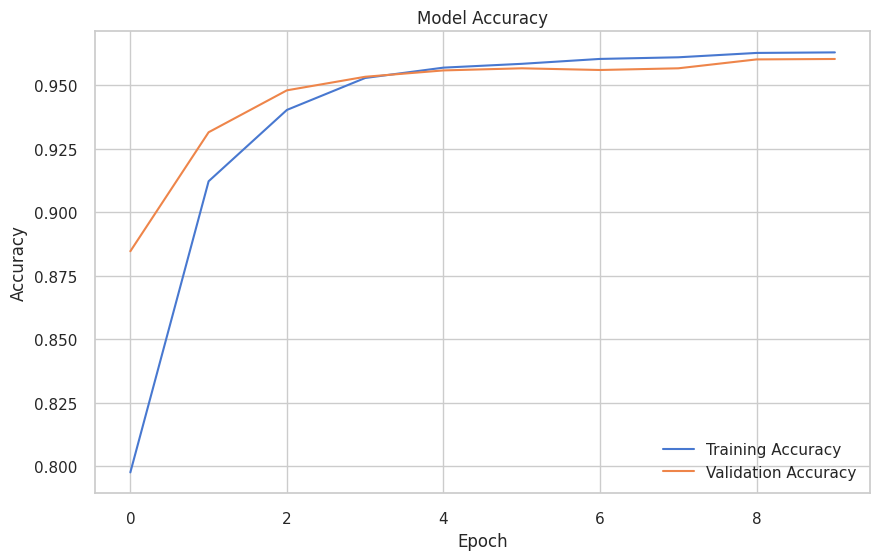

In [75]:
# prompt: graph the 10 epochs

import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()


In [76]:
import tensorflow as tf
from tensorflow import keras

# Assuming X_train, X_test, y_train, y_test are already defined and preprocessed

# Define a simple deep learning model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
predictions = model.predict(X_test)


Epoch 1/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7196 - loss: 0.5597 - val_accuracy: 0.8780 - val_loss: 0.3123
Epoch 2/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8963 - loss: 0.2732 - val_accuracy: 0.9283 - val_loss: 0.1995
Epoch 3/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9376 - loss: 0.1825 - val_accuracy: 0.9497 - val_loss: 0.1625
Epoch 4/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9481 - loss: 0.1573 - val_accuracy: 0.9545 - val_loss: 0.1481
Epoch 5/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9539 - loss: 0.1427 - val_accuracy: 0.9575 - val_loss: 0.1390
Epoch 6/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9594 - loss: 0.1308 - val_accuracy: 0.9570 - val_loss: 0.1363
Epoch 7/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9591 - loss: 0.1305 - val_accuracy: 0.9602 - val_loss: 0.1343
Epoch 8/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9598 - loss: 0.1260 - val_accuracy: 0.

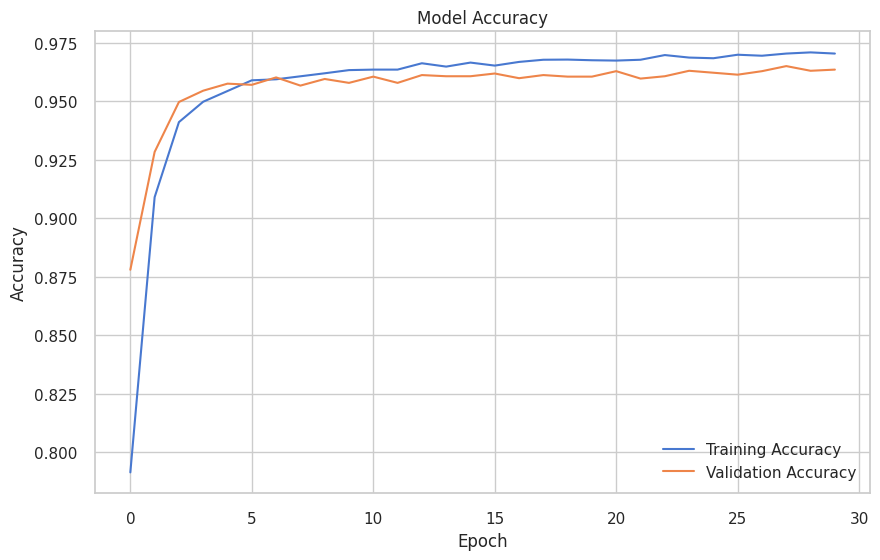

In [77]:
# prompt: graph the 10 epochs

import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()
